<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture12</div>
<div style="text-align: right">Dino Konstantopoulos, 2 December 2019, with material from Matt Rocklin, J. Nunez-Iglesias, </div>
<div style="text-align: right">Frank McSherry, Kiefer Katovich, Joseph Nelson, Charlie Greenbacker, Dan Jurafsky, the NLTK people,</div>
<div style="text-align: right">and the European Digital Research Infrastructure for the Arts and Humanities consortium, DARIAH-DE initiative, German branch of DARIAH-EU</div>

<br />

I like good plots, and I think this one depicts **Data Science** pretty well (movies to movie genres):
<br />
<left>
<img src="images/movie-genres.png" width=400 />
    <center>Dimensionality Reduction</center>
</left>

This week, we study Natural Language Processing in the context of Data Science, to help you with your final project. This is a loooooooooooooooooooooooooong notebook..

## Notebook Contents:
- Part 1: [Introduction to Natural Language Processing (NLP)](#section1)
- Part 2: [Big Data processing: Optimizations often required for NLP](#section2)
- Part 3: [NLP with the Reuters dataset](#section3)
- Part 4: [Words 2 Vectors](#section4)
- Part 5: [NLP-ing Litterature](#section5)

<a id='section1'></a>


# Part 1: Introduction to Natural Language Processing (NLP)

<br />
<left>
<img src="images/nlp.jpg" width=600 />
</left>

Natural language processing is the task of **extracting** information and ***meaning*** (semantics) from text documents.

These tasks may range from simple classification tasks, such as deciding what category a piece of text falls into, to more complex tasks like translating or summarizing text.

Here are some examples:
- [Chatbots](https://dialogflow.com/)
- [Text to speech](https://www.google.com/intl/en/chrome/demos/speech.html)

For most tasks, a fair amount of pre-processing is required to make the text digestible for algorithms.  We typically need to add **structure** to our *unstructured* data. [Here](http://www.aaai.org/Magazine/Watson/watson.php) is why, about [IBM's Watson](https://en.wikipedia.org/wiki/Watson_(computer)).

> **SIRI**: A system like Siri uses voice-to-transcription to record a command and then various **advanced** NLP algorithms to identify the question asked and possible answers

The main **challenges** of NLP are **ambiguity** and **knowledge**:
- **Ambiguity**:
    - *Hospitals Are Sued by 7 Foot Doctors*
    - *Juvenile Court to Try Shooting Defendant*
    - *Local High School Dropouts Cut in Half*
- **Knowledge:** 
    - *Mary and Sue are sisters, Mary and Sue are mothers*.

**Tokenization** is the task of separating a sentence into its constituent parts, or **tokens**. *Example*: Data Science is the future! → [`Data Science`, `is`, `the future`].

**Stemming** and **lemmatization** help identify common roots of words. Stemming is a crude process of removing common endings from sentences, such as `s`, `es`, `ly`, `ing`, and `ed`. *Example*: `badly` → `bad`. Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word. *Example*: Best and better are the enemy of good → [`Most good` and `more good` are the enemy of good].  

**Tagging** and **parsing** is the process of understanding the **grammar** of a sentence: We need to **tag** important topics and **parse** their dependencies.  

<br />
<left>
<img src="images/john-hit-the-ball.png" width=250 />
</left>

Our goal is to identify the actors and actions in the text in order to extract meaning.

Tagging and parsing is made up of a few overlapping subproblems:

- **Parts of speech** (POS) tagging: What are the parts of speech in a sentence (e.g. noun, verb, adjective, etc)?

- **Chunking**: Can we identify the pieces of the sentence that go together in meaningful chunks (e.g. noun or verb phrases)?

- **Named entity recognition**: Can we identify specific proper nouns?  Can we pick out people and locations?

The consortium [Universal Dependencies](https://universaldependencies.org/) a framework for consistent annotation of grammar (parts of speech, morphological features, and syntactic dependencies) across different human languages. UD is an open community effort with over 200 contributors producing more than 100 treebanks in over 70 languages, including english, hindi, chinese, and ancient and modern greek: ***One*** framework, ***many*** languages. [Google](https://ai.googleblog.com/2016/05/announcing-syntaxnet-worlds-most.html) and [Microsoft](https://www.microsoft.com/en-us/research/group/natural-language-processing/) dominate this field with implementations. Google's implementation has a *funny* name: Parsey McParseface (`Parse`y Mc`Parse`face). It is a joke from the [Boaty McBoatface](https://www.nytimes.com/2016/03/22/world/europe/boaty-mcboatface-what-you-get-when-you-let-the-internet-decide.html) debacle. [Try it out](https://deepai.org/machine-learning-model/parseymcparseface) on a Web page. Here's how to try it out on a command line:

>**CURLing**: curl \
    -F 'sentence=YOUR_TEXT_URL' \
    -H 'api-key:quickstart-QUdJIGlzIGNvbWluZy4uLi4K' \
    https://api.deepai.org/api/parseymcparseface 

## 1. Text classification with BAG-OF-WORDS

**Text classification** is the task of predicting which category or topic a text sample is from. Typically, this is done by using the text as features and the label as the target output.  This is referred to as [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) classification.

For example, we may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

To include text as features, we usually create a binary feature for each word, i.e. does this piece of text contain that word? To create binary text features, we first create a vocabulary to account for all possible words in our universe. But you need to consider several things to decide if bag-of-words is appropriate:

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

`Scikit-learn`, in package `sklearn.preprocessing.text`, has many pre-processing utilities that simplify tasks required to convert text into features for a model.

`CountVectorizer` converts a collection of text into a matrix of features.  Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

> **OVERFITTING**: Using all of the words can be useful, but YOU may need to use regularization to avoid overfitting.  Otherwise, rare words may cause the model to overfit and not generalize.

`CountVectorizer` code:
```(PYTHON)
from sklearn.feature_extraction.text import CountVectorizervectorizer = CountVectorizer(max_features = 1000,                              ngram_range=(1, 2),                              stop_words='english',                             binary=True)

ngram_range - a range of word phrases to use
(1,1) means use all single words
(1,2) means use all singles +  contiguous pairs of word
(1,3) means use all singles + pairs + triples

stop_words=’english’
Stop words are non-content words (e.g. ‘to’, ‘the’, ‘it’, etc).  They aren’t helpful for prediction, so they get removed!

max_features=1000
Maximum number of words to consider (uses the first N most frequent)

binary=True
To use a dummy column as the entry (1 or 0, as opposed to the count).  This is useful if you think a word appearing 10 times is no more important than whether the word appears at all.
```

`Vectorizer`s are like other transformers in scikit-learn (e.g. `StandardScaler`). We create a vectorizer object with the parameters of our feature space. We fit a vectorizer to learn the vocabulary. We transform a set of text into that feature space.

> Note: there is a distinction between `fit` and `transform`. We `fit` from our training set.  This is part of the model building process, so we don’t look at our test set. We `transform` our test set using our model fit on the training set.

`fit` and `transform` code:
```(python)
titles = data['title'].fillna('')
from sklearn.feature_extraction.text 
import CountVectorizer
vectorizer = CountVectorizer(max_features = 1000, 
                ngram_range=(1, 2), 
                stop_words='english',
                binary=True)
               
# Use `fit` to learn the vocabulary of the titles 
vectorizer.fit(titles)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(titles)
```

## 2. Text classification with TFIDF

An alternative bag-of-words approach to CountVectorizer is a [Term Frequency - Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (TF-IDF) representation.

TF-IDF uses the product of two intermediate values, the **Term Frequency** and **Inverse Document Frequency**.

Term Frequency is equivalent to CountVectorizer features, just the number of times a word appears in the document (i.e. count).

Document Frequency is the percentage of documents that a particular word appears in and Inverse Document Frequency is just 1/Document Frequency.

Combining, TF-IDF = Term Frequency * Inverse Document Frequency or TF-IDF = Term Frequency / Document Frequency

The intuition is that the words that have high weight are those that either appear frequently in this document or appear rarely in other documents (and are therefore unique to this document).  

This is a good alternative to using a static set of “stop” words.
```(python)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
```

## 3. Build a random forest model to predict words

We may want to build a **predictive text box**, the way Google does it on their Web page. In that case, the **independent variable** is a partial (incomplete) sequence, and the **dependent variable** (y) is a word: 
```(python)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)

# Use `fit` to learn the vocabulary of the titles (titles is a vector of sentences)
titles = data['title'].fillna('')
vectorizer.fit(titles)

# Use `tranform` to generate the sample x word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(titles)

# learn
y = data['label']
model.fit(X, y)

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))
```

## 4. *More* than Binary: Vectorization

When building a machine learning model, we typically must transform our data into **numeric** features. We already talked about the simple example of creating a binary feature (0 or 1, True or False) per word.If you do this in ***multiple dimensions***, then this process of transforming non-numeric data into numeric features is called [**vectorization**](https://en.wikipedia.org/wiki/Word_embedding). 

### Install TextBlob

This is an **introductory** class to Data Science. So we learn the ***simplest*** things (sometimes you think professor is crazy because GPs are not the simplest things). But when you'll start working you will understand that professor was very gentle on you, teaching you the simplest things, first!

The `TextBlob` Python library provides a simplified interface for exploring common NLP tasks including `part-of-speech tagging`, `noun phrase extraction`, `sentiment analysis`, `classification`, `translation`, and more. Another popular python NLP library is [Spacy](https://spacy.io).

First, install TextBlob.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**Or:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

## 5. Classic NLP use case: Yelp reviews and spam filtering

A [corpus](https://en.wikipedia.org/wiki/Corpus) is a collection of documents (derived from the Latin word for "body"). **corpora** is the plural form of corpus. We'll use a CountVectorizer on the yelp dataset on blackboard. [Here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) is CountVectorizer's documentation.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [3]:
# Read yelp.csv into a DataFrame.
path = r'data/yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star (good) and 1-star (bad) reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# Head of the original data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


A [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix) is a mathematical matrix that describes the **frequency** of **terms** (words) that occur in a collection of documents. In a document-term matrix, **rows** correspond to **documents** in the collection and **columns** correspond to **terms**. 

In [5]:
# Use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [6]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation)
X_train_dtm.shape

(3064, 16825)

In [7]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [8]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

When building models, **dimensionality reduction** is paramount. Brain cells, whether natural are artificial are *limited*!

One common method of reducing the number of features is converting all text to lowercase before generating features! Note that to a computer, `aPPle` is a different token/"word" than `apple`. So, by converting both to lowercase letters, it ensures fewer features will be generated. 

Sometimes though, when capitalization matters, it is better ***not*** to convert them to lowercase:

In [9]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
[word for word in vect.get_feature_names() if word.startswith('Z')]

['Z11',
 'ZERO',
 'ZExperience',
 'ZIA',
 'ZIn',
 'Zabba',
 'Zach',
 'Zam',
 'Zanella',
 'Zankou',
 'Zappos',
 'Zatsiki',
 'Zen',
 'Zero',
 'Zha',
 'Zihuatenejo',
 'Zinburger',
 'Zinburgergeist',
 'Zinfandel',
 'Zipcar',
 'Zippers',
 'Zipps',
 'Ziti',
 'Zoe',
 'Zombi',
 'Zombies',
 'Zoo',
 'Zoyo',
 'ZuZu',
 'Zucca',
 'Zumba']

### Naive Bayes

Let's use [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) to predict star rating. Naive Bayes is a simple probabilistic classifier based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. We'll first learn star rating. Then we'll be able to predict just by reading a review.

Naive Bayes is a popular classifier because it has minimal storage requirements, is fast, can be tuned easily with more data and has found very useful applications in text classificaton. Paul Graham originally proposed using Naive Bayes to detect spam in his [Plan for Spam](http://www.paulgraham.com/spam.html).

>**NOTE**: The ***naive*** assumption of Naive Bayes, that features are **conditionally independent**, that the normalization constant (the denominator) can be ignored since it's the same for all classes, and that t The prior probability is much less relevant once you have a lot of features are ***critical*** to making these calculations simple

Recall that Bayes is all about adjusting probabilities as more data is gathered:

$$P(A \ | \ B) = \frac {P(B \ | \ A) \times P(A)} {P(B)}$$

- **$P(A \ | \ B)$** : Probability of `Event A` occurring given `Event B` has occurred.
- **$P(B \ | \ A)$** : Probability of `Event B` occurring given `Event A` has occurred.
- **$P(A)$** : Probability of `Event A` occurring.
- **$P(B)$** : Probability of `Event B` occurring.

Advantages of Naive Bayes are:

- Model training and prediction are very fast.
- It's somewhat interpretable.
- No tuning is required.
- Features don't need scaling.
- It's insensitive to irrelevant features (with enough observations).
- It performs better than logistic regression when the training set is very small.

Disadvantages of Naive Bayes are:

- If "spam" is dependent on non-independent combinations of individual words, it may not work well.
- Predicted probabilities are not well calibrated.
- Correlated features can be problematic (due to the independence assumption).
- It can't handle negative features (with Multinomial Naive Bayes).
- It has a higher "asymptotic error" than logistic regression.

### How it works

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam** (*ham* means not spam; it can include emails that look like spam but you opt into).

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that features (words) are **conditionally independent**, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

Note that each conditional probability in the numerator is easily calculated directly from training data!

So, we can calculate all of the values in the numerator by examining a corpus of spam email:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

Now repeat this process with a corpus of ham email:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the higher probability, $P(\text{send money now}))$ is the same on both equations, and so we predict that the email is spam!

In [10]:
# Use default options for CountVectorizer
vect = CountVectorizer()

# Create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9187866927592955


In [11]:
y_test.value_counts()

5    838
1    184
Name: stars, dtype: int64

In [12]:
y_test.value_counts(normalize=True)

5    0.819961
1    0.180039
Name: stars, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

5    0.819961
1    0.180039
Name: stars, dtype: float64

In [14]:
# Calculate null accuracy.
y_test_binary = np.where(y_test==5, 1, 0) # five stars become 1, one stars become 0
print('Percent 5 Stars:', y_test_binary.mean())
print('Percent 1 Stars:', 1 - y_test_binary.mean())

Percent 5 Stars: 0.8199608610567515
Percent 1 Stars: 0.18003913894324852


Our Naive Bayes model a few cells back predicted ~92% accuracy, better than `fit_transform`'s 82% accuracy!

 Notice how the data was transformed into this sparse matrix with 1,022 datapoints and 16,825 features:
   - Recall that vectorizations of text will be **mostly zeros**, since only a few unique words are in each document.
   - For that reason, instead of storing all the zeros we only store non-zero values (inside the 'sparse matrix' data structure!)
   - We have 3064 Yelp reviews in our training set
   - 16,825 unique words were found across all documents

In [15]:
X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

Let's take a look at the vocabulary that was generated, containing 16,825 unique words. 'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix. For example, the word `only` is index \#10362 in the sparse matrix.

In [16]:
vect.vocabulary_

{'filly': 5773,
 'only': 10362,
 'reviews': 12465,
 'nine': 10069,
 'now': 10180,
 'wow': 16612,
 'do': 4631,
 'miss': 9578,
 'this': 15093,
 'place': 11186,
 '24hrs': 136,
 'drive': 4809,
 'thru': 15136,
 'or': 10413,
 'walk': 16195,
 'up': 15834,
 'ridiculously': 12514,
 'cheap': 2789,
 'tasty': 14838,
 'of': 10286,
 'course': 3679,
 'the': 15032,
 'arizona': 1018,
 'burritos': 2286,
 'are': 1003,
 'good': 6571,
 'everything': 5342,
 'is': 7956,
 'used': 15885,
 'to': 15228,
 'love': 8899,
 'one': 10354,
 'combos': 3233,
 'you': 16727,
 'get': 6433,
 'beef': 1564,
 'burrito': 2285,
 'taco': 14720,
 'rice': 12489,
 'and': 805,
 'beans': 1528,
 'for': 6028,
 'under': 15683,
 'color': 3213,
 'me': 9301,
 'silly': 13462,
 'call': 2398,
 'sally': 12808,
 'they': 15067,
 'have': 7023,
 'bomb': 1902,
 'horchata': 7345,
 'too': 15281,
 'really': 12038,
 'fresh': 6154,
 'flautas': 5882,
 'rolled': 12622,
 'tacos': 14721,
 'breakfast': 2069,
 'damn': 3999,
 'here': 7149,
 'whether': 16394,
 'd

Finally, let's convert the sparse matrix to a typical ndarray using .toarray(). Remember, this takes up ***a lot*** more memory than the sparse matrix! However, this conversion is sometimes necessary.

In [17]:
X_test_dtm_dense = X_test_dtm.toarray()

We will use this function below for simplicity:

In [18]:
# Define a function that accepts a vectorizer and calculates accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

`min_df` ignores words that occur less than twice (`df` means **document frequency**).

In [19]:
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

('Features: ', 8783)
('Accuracy: ', 0.9246575342465754)


### N-Grams

N-grams are features which consist of N consecutive words. This is useful because, for example, when using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`.

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [20]:
# Include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

We can start to see how supplementing our features with n-grams can lead to more feature columns: When we produce n-grams from a document with $W$ words, we add an additional $(n-W+1)$ features (at most)! This is similar to what is traditionally done with CNN ANNs, where we additionally train the model with rotated pictures of the stock training data set.

That said, be careful — when we compute n-grams from an entire corpus, the number of ***unique*** n-grams could be vastly higher than the number of unique unigrams! This could cause an undesired feature explosion.

Although we sometimes add important new features that have meaning such as `data scientist`, many of the new features could just be noise. So, particularly if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix. So, be careful..

In [21]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['zone out', 'zone when', 'zones', 'zones dolls', 'zoning', 'zoning issues', 'zoo', 'zoo and', 'zoo is', 'zoo not', 'zoo the', 'zoo ve', 'zoyo', 'zoyo for', 'zucca', 'zucca appetizer', 'zucchini', 'zucchini and', 'zucchini bread', 'zucchini broccoli', 'zucchini carrots', 'zucchini fries', 'zucchini pieces', 'zucchini strips', 'zucchini veal', 'zucchini very', 'zucchini with', 'zuchinni', 'zuchinni again', 'zuchinni the', 'zumba', 'zumba class', 'zumba or', 'zumba yogalates', 'zupa', 'zupa flavors', 'zuzu', 'zuzu in', 'zuzu is', 'zuzu the', 'zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


### Stop-Word Removal

[Stop-word](https://en.wikipedia.org/wiki/Stop_words) removal is used to remove common words that will likely appear in any text. Because common words exist in ***most*** documents, they likely only add noise to your model and should be removed.

**Stop words** are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since `a` appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [22]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [23]:
# Set of stop words
print((vect.get_stop_words()))

None


Let's remove English stop words:

In [24]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

('Features: ', 16528)
('Accuracy: ', 0.9158512720156555)


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### Other CountVectorizer Options

- `max_features`: int or None, default=None

If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [25]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

('Features: ', 100)
('Accuracy: ', 0.8698630136986302)


In [26]:
# All 100 features
print((vect.get_feature_names()))

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'table', 'thing', 'things', 'think', 'time', 'times', 'took', 'town', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, there is roughly a 1.6% increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. Note that if we restrict it to only unigrams, then the accuracy increases even more! So, bigrams were very likely adding more noise than signal. 

In the end, by only using 16,000 unigram features we came away with a much smaller, simpler, and easier-to-think-about model which also resulted in higher accuracy.

In [27]:
# Include 1-grams and 2-grams, and limit the number of features

print('1-grams and 2-grams, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

print()
print('1-grams only, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 1), max_features=100000)
tokenize_test(vect)

1-grams and 2-grams, up to 100K features:
('Features: ', 100000)
('Accuracy: ', 0.8855185909980431)

1-grams only, up to 100K features:
('Features: ', 16825)
('Accuracy: ', 0.9187866927592955)


- `min_df`: Float in range [0.0, 1.0] or int, default=1

When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. This value is also called **cut-off** in the literature. If float, the parameter represents a *proportion of documents*, integer absolute counts.

In [28]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

('Features: ', 43957)
('Accuracy: ', 0.9324853228962818)


<a id='textblob'></a>
### Introduction to TextBlob

`TextBlob`, which we already installed, is a Python library used to explore common NLP tasks. You can read more about TextBlob [here](https://textblob.readthedocs.io/en/dev/).

In [29]:
# Print the first review.
print((yelp_best_worst.text[0]))

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


Let's save it as a `TextBlob` object:

In [30]:
review1 = TextBlob(yelp_best_worst.text[0])

Let's list the words and sentences:

In [35]:
review1.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [36]:
review1.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


Some string methods are immediately available:

In [37]:
review1.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

### Stemming and Lemmatization

As we saw before, **stemming** is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed". This intelligently reduces the number of features by grouping together (hopefully) related words. Stemming uses a simple and fast rule-based approach, stemmed words are usually not shown to users (used for analysis/indexing), and some search engines treat words with the same stem as synonyms.

In [38]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

# Stem each word.
stemmed1 = [stemmer.stem(word) for word in review1.words]
print(len(stemmed1))
print(stemmed1)

159
['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'd

**Lemmatization** is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best". Lemmatization derives the **canonical form** ("lemma") of a word. It can be better than stemming. It uses a dictionary-based approach (slower than stemming). But we need to first assume whether words are nouns or verbs:

In [39]:
# Assume every word is a noun
lemmatized1 = [word.lemmatize() for word in review1.words]
print(len(lemmatized1))
print(lemmatized1)

159
['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 's

In [40]:
# Assume every word is a verb
lemmatized1v = [word.lemmatize(pos='v') for word in review1.words]
print(len(lemmatized1v))
print(lemmatized1v)

159
['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', '

Some examples you can see are `took` lemmatized to `take` and `was` lemmatized to `be`.

Assuming Parts of Speech, means we need to do a POS analysis, first!

In [41]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

# Last 50 features
print((vect.get_feature_names()[-50:]))

('Features: ', 16444)
('Accuracy: ', 0.9207436399217221)
['yuyuyummy', 'yuzu', 'z', 'z-grill', 'z11', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zen-like', 'zero', 'zero-star', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zipps', 'ziti', 'zoe', 'zombi', 'zombie', 'zone', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel-kräuter', 'zzed', 'éclairs', 'école', 'ém']


With all available options for `CountVectorizer()`, you may wonder how to decide which to use! It's true that you can sometimes reason about which preprocessing techniques might work best. However, you will often not know for sure without trying out many different combinations and comparing their accuracies. 

> **NOTE**: Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

### Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a word appears in a document, the more complex **TF-IDF Vectorizer** analyzes the uniqueness of words ***between documents** to find distinguishing characteristics. 
     
Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents. It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). It's most often arch-engine scoring, text summarization, and document clustering.

In [42]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

# Term frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [43]:
# Document frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [44]:
# Term frequency–inverse document frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The ***higher*** the TF–IDF value, the more ***important*** the word is to that specific document. 

Here, `cab` is the most important and unique word in document 1, while `please` is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [45]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


Let's use TF–IDF to Summarize a Yelp Review. 

In [46]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')

# Fit transform Yelp data.
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [47]:
def summarize():
    
    # Choose a random review that is at least 300 characters long
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review
    print(('\n' + review_text))

In [48]:
summarize()

TOP SCORING WORDS:
airport
fab
dfw
pheonix
does

RANDOM WORDS:
really
section
slim
airport
view

I've only flown in and out of Pheonix Airport through Southwest, so i've only been in one section of this airport- but it isn't that great. THe food choices are slim and none are fab- I mean, really what airport had fab food- wait DFW does! Anyway- the Sky Harbor does have is a great view and decently clean restrooms.


### Sentiment Analysis

Sentiment Analysis is understanding how **positive** or **negative** a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of positive words and a list of negative words and count how many occur in a document. 
- Train a classifier given many examples of positive documents and negative documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular ***to your application***. Generic models (such as the one we are about to use) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate!

In [49]:
print(review1)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [50]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
review1.sentiment.polarity

0.40246913580246907

In [51]:
# Understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [52]:
# Define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [53]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

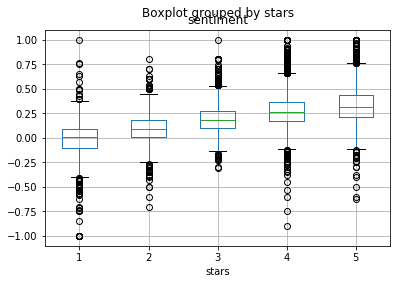

In [54]:
# Box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [55]:
# Reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [56]:
# Reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [57]:
# Widen the column display.
pd.set_option('max_colwidth', 500)

In [58]:
# Negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [59]:
# Positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [60]:
# Reset the column display width.
pd.reset_option('max_colwidth')

### Adding Features to a Document-Term Matrix

Let's add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> **NOTE**: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on  model outcome!

In [61]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

(3064, 16825)
(1022, 16825)


In [63]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [64]:
# Cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [65]:
# Combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [66]:
# Repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [67]:
# Use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9168297455968689


/Users/brickeawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
# Use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9227005870841487


### More TextBlob Features

In [69]:
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [70]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [71]:
# Definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [72]:
# Language identification
TextBlob('’Είπε ο γάιδαρος τον πετεινό κεφάλα').detect_language()

'el'

In [73]:
# translation
TextBlob('’Είπε ο γάιδαρος τον πετεινό κεφάλα').translate(to="en") 

TextBlob("Said the donkey with its flying head")

>**NOTE**: The correct translation is *the donkey called the rooster big-headed*.

In [74]:
TextBlob('जंगल में मोर नाचा किस ने देखा ?').detect_language()

'hi'

In [75]:
TextBlob('जंगल में मोर नाचा किस ने देखा ?').translate(to="en") 

TextBlob("Wood In A Wilderness ?")

>**NOTE**: The correct translation is *Who saw a peacock dance in the woods?*.

In [76]:
TextBlob('授人以鱼不如授人以渔').detect_language()

'zh-CN'

In [77]:
TextBlob('授人以鱼不如授人以渔').translate(to="en") 

TextBlob("It is better to teach people to fish")

>**NOTE**: The more litteral translation is *Giving a man a fish is not equal to teaching a man to fish*.

<a id='section2'></a>

## Notebook Contents:
- Part 1: [Introduction to Natural Language Processing (NLP)](#section1)
- Part 2: [Big Data processing: Optimizations often required for NLP](#section2)
- Part 3: [NLP with the Reuters dataset](#section3)
- Part 4: [Words 2 Vectors](#section4)
- Part 5: [NLP-ing Litterature](#section5)


# Part 2: Big Data processing: Optimizations often required for NLP

Artificial Neural Networks (ANN) learning to do Natural Language Processing (NLP) require tons of data to learn correctly. So I need to show you some Big Data techniques.

<br />
<left>
<img src="images/big-data.png" width=600 />
</left>

**Streaming** is not a `SciPy` feature per se, but rather an approach that
allows you to efficiently process large datasets, like those often
seen in science or in Natural Langiage Processing. 

The Python language contains some useful primitives
for streaming data processing, and these can be combined with the
`Toolz` library to generate elegant, concise code that is extremely
memory-efficient. 

Let's apply these streaming concepts to enable you to 
handle much larger datasets than can fit in your computer's RAM.

You have probably already done some streaming, perhaps without thinking about it in these terms.
The simplest form is probably iterating through lines in a files, processing each line without ever reading the entire file into memory.

For example a loop like this to calculate the mean of each row and sum them:

In [78]:
import numpy as np
with open('data/expr.tsv') as f:
    sum_of_means = 0
    for line in f:
        sum_of_means += np.mean(np.fromstring(line, dtype=int, sep='\t'))
print(sum_of_means)

1463.0


This strategy works really well for cases where your problem can be neatly solved with by-row processing.
But things can quickly get out of hand when your code becomes more sophisticated.

In streaming programs, a function processes *some* of the input data, returns the
processed chunk, then, while downstream functions are dealing with that chunk,
the function receives a bit more, and so on...

<br />
<left>
<img src="images/processing.jpg" width=400 />
</left>

Constructs in the `toolz` library make streaming programs easy and elegant to write.

Suppose you have some data in a text file, and you want to compute the column-wise average of $\log(x+1)$ of the values.
The common way to do this would be to use `NumPy` to load the values, compute the `log` function for all values in the full matrix, and then take the mean over the 1st axis:

In [79]:
import numpy as np
expr = np.loadtxt('data/expr.tsv')
logexpr = np.log(expr + 1)
np.mean(logexpr, axis=0)

array([3.11797294, 2.48682887, 2.19580049, 2.36001866, 2.70124539,
       2.64721531, 2.43704834, 3.28539133, 2.05363724, 2.37151577,
       3.85450782, 3.9488385 , 2.46680157, 2.36334423, 3.18381635,
       2.64438124, 2.62966516, 2.84790568, 2.61691451, 4.12513405])

This works, and it follows a reassuringly familiar input-output model of computation.
But it's pretty ***inefficient**:

- We load the full matrix into memory (1), 
- then make a copy with 1 added to each value (2), 
- then make another copy to compute the log (3), 
- before finally passing it on to `np.mean`.

That's ***three*** instances of the data array, to perform an operation that doesn't require keeping even *one* instance in memory.

For any kind of **big data** operation, this approach won't work.

Python's creators knew this, and built-in the **yield** keyword (first made widely available in C#), which enables a function to process just one ***sip*** of the data, pass the result on to the next process, and *let the chain of processing complete* for that one piece of data before moving on to the next one.

**Yield** is a rather nice name for it: the function *yields* control to the next function, waiting to resume processing the data until all the downstream steps have processed that data point. The yield construct is what makes *generators* or *coroutines* possible: the ability to leave a funcion midstream, and then when you call the function again you don't enter through the start of the function, but where you left off: at *yield return*. That is why generators and coroutines return collections: each item of that collection is the return of a single *yield return*.

## Streaming with `yield`

Here's another way to think about it: for every processing function that would normally take a list (a collection of data) and transform that list, you can rewrite that function as taking a *stream* and *yielding* the result of *every element* in that stream.

Here's an example where we take the log of each element in a list, using either a standard data-copying method or a streaming method:

In [80]:
def log_all_standard(input):
    output = []
    for elem in input:
        output.append(np.log(elem))
    return output

def log_all_streaming(input_stream):
    for elem in input_stream:
        yield np.log(elem)

Let's check that we get the same result with both methods:

In [81]:
# We set the random seed so we will get consistent results
np.random.seed(seed=7)
# Set print options to show only 3 significant digits
np.set_printoptions(precision=3, suppress=True)

arr = np.random.rand(1000) + 0.5
result_batch = sum(log_all_standard(arr))
print('Batch result: ', result_batch)
result_stream = sum(log_all_streaming(arr))
print('Stream result: ', result_stream)

Batch result:  -48.2409194560661
Stream result:  -48.2409194560661


The advantage of the streaming approach is that elements of a stream ***aren't processed until they're needed***, whether it's for computing a running sum, or for writing out to disk, or something else. This is called **lazy processing**, or [lazy initialization](https://en.wikipedia.org/wiki/Lazy_initialization).

This can conserve a lot of memory when you have many input items, or when each item is very big.
This quote from one of Matt Rocklin's (author of `Toolz`) blog posts very succinctly summarizes the utility of streaming data analysis:

> In my brief experience people rarely take this [streaming] route.
They use single-threaded in-memory Python until it breaks, and then seek out Big Data Infrastructure like Hadoop/Spark at relatively high productivity overhead.

Yup, pretty classic: *Professor, we need to learn spark because that's the only way we can do bigdata processing*. Nope, not the right answer. The answer is streaming, sparse matrices, and elegant algorithms in `SciPy`.

In some cases, streaming can get you there even faster than the supercomputing approach, by eliminating the overhead of multi-core communication and random-access to databases. See this [post](http://www.frankmcsherry.org/graph/scalability/cost/2015/02/04/COST2.html) by Frank McSherry, and then [this](http://www.frankmcsherry.org/graph/scalability/cost/2015/02/04/COST2.html) one, where he processes a 128 billion edge graph on his laptop *faster* than using a graph database on a supercomputer (open the Web page, but don't read it now because if i say what's going to be on your final exam next, you're going to miss it).

Then stop and think.

</br >
<center>
<img src="images/snake-oil-salesman.jpg" width=300 />
    Buddy, you really need to use xyz framework, it will solve all your problems bro!
</center>

To clarify the flow of control when using streaming-style functions, it's useful to make *verbose* versions of the functions, which print out a message with each operation, slow down the throttle to give you the time to read the messages, and use `tqdm` to show progress.
```(python)
pip install tqdm
```

Here below, we ***simulate*** reading from a big file using python `sleep()` statements.

In [82]:
import numpy as np
import os
from time import sleep
from tqdm import tqdm

def tsv_line_to_array(line):
    lst = [float(elem) for elem in line.rstrip().split('\t')]
    return np.array(lst)

def readtsv(filename):
    print('starting readtsv')
    num_lines = 0
    #statinfo = os.stat(filename)
    #statinfo.st_size
    with open(filename, 'r') as f:
        for line in f:
            num_lines += 1
    with tqdm(total=num_lines) as pbar:
        with open(filename) as fin:
            for i, line in enumerate(fin):
                print(f'reading line {i}')
                sleep(2)
                pbar.update(1)
                yield tsv_line_to_array(line)
    print('finished readtsv')

def add1(arrays_iter):
    print('starting adding 1')
    for i, arr in enumerate(arrays_iter):
        print(f'adding 1 to line {i}')
        yield arr + 1
    print('finished adding 1')

def log(arrays_iter):
    print('starting log')
    for i, arr in enumerate(arrays_iter):
        print(f'taking log of array {i}')
        yield np.log(arr)
    print('finished log')

def running_mean(arrays_iter):
    print('starting running mean')
    for i, arr in enumerate(arrays_iter):
        if i == 0:
            mean = arr
        mean += (arr - mean) / (i + 1)
        print(f'adding line {i} to the running mean')
    print('returning mean')
    return mean

Let's see it in action for a small sample file. We slow everything down with `sleep()`, and leverage `tqdm`. For efficiency, you would go in and remove the `sleep` calls when reading in a big file.

In [83]:
fin = 'data/expr.tsv'
print('Creating lines iterator')
lines = readtsv(fin)
print('Creating loglines iterator')
loglines = log(add1(lines))
print('Computing mean')
mean = running_mean(loglines)
print(f'the mean log-row is: {mean}')

  0%|          | 0/5 [00:00<?, ?it/s]

Creating lines iterator
Creating loglines iterator
Computing mean
starting running mean
starting log
starting adding 1
starting readtsv
reading line 0


 20%|██        | 1/5 [00:02<00:08,  2.00s/it]

adding 1 to line 0
taking log of array 0
adding line 0 to the running mean
reading line 1


 40%|████      | 2/5 [00:04<00:06,  2.00s/it]

adding 1 to line 1
taking log of array 1
adding line 1 to the running mean
reading line 2


 60%|██████    | 3/5 [00:06<00:04,  2.00s/it]

adding 1 to line 2
taking log of array 2
adding line 2 to the running mean
reading line 3


 80%|████████  | 4/5 [00:08<00:02,  2.00s/it]

adding 1 to line 3
taking log of array 3
adding line 3 to the running mean
reading line 4


100%|██████████| 5/5 [00:10<00:00,  2.00s/it]

adding 1 to line 4
taking log of array 4
adding line 4 to the running mean
finished readtsv
finished adding 1
finished log
returning mean
the mean log-row is: [3.118 2.487 2.196 2.36  2.701 2.647 2.437 3.285 2.054 2.372 3.855 3.949
 2.467 2.363 3.184 2.644 2.63  2.848 2.617 4.125]


Note:

- None of the computation is run when creating the lines and loglines iterators. This is because iterators are *lazy*, meaning they are not evaluated (or *consumed*) until a result is needed.
- When the computation is finally triggered, by the call to `running_mean`, it jumps back and forth between all the functions, as various computations are performed on each line, before moving on to the next line.

## Use case: The Toolz streaming library

I'm giving you this use case to study, but we won't do this together in class today (no time). I taught a class in **Life sciences with python** at Harvard, and this is an example I studied with Harvard students.

Matt Rocklin wrote `Toolz` and illustrates the library with a Markov model from a human genome in under 5 minutes on a laptop, using a few lines of code.

J. Nunez Iglesias applied the algorithm to a fly genome (about 1/20 the size), so this is better for class.

Please download the genome from [here](http://hgdownload-test.cse.ucsc.edu/goldenPath/dm6/bigZips/): the file `dm6.fa.gz`, and uncompress it with 7-zip to `dm6.fa`.

In [84]:
import toolz as tz
from toolz import curried as c
from glob import glob
import itertools as it

# Adenine, Cytosine, Guanine, Tyramine:
LDICT = dict(zip('ACGTacgt', range(8)))
PDICT = {(a, b): (LDICT[a], LDICT[b])
         for a, b in it.product(LDICT, LDICT)}

def is_sequence(line):
    return not line.startswith('>')

def is_nucleotide(letter):
    return letter in LDICT  # ignore 'N'

@tz.curry
def increment_model(model, index):
    model[index] += 1

    
def genome(file_pattern):
    """Stream a genome, letter by letter, from a list of FASTA filenames."""
    return tz.pipe(file_pattern, glob, sorted,  # Filenames
                   c.map(open),  # lines
                   # concatenate lines from all files:
                   tz.concat,
                   # drop header from each sequence
                   c.filter(is_sequence),
                   # concatenate characters from all lines
                   tz.concat,
                   # discard newlines and 'N'
                   c.filter(is_nucleotide))


def markov(seq):
    """Get a 1st-order Markov model from a sequence of nucleotides."""
    model = np.zeros((8, 8))
    tz.last(tz.pipe(seq,
                    c.sliding_window(2),        # each successive tuple
                    c.map(PDICT.__getitem__),   # location in matrix of tuple
                    c.map(increment_model(model))))  # increment matrix
    # convert counts to transition probability matrix
    model /= np.sum(model, axis=1)[:, np.newaxis]
    return model

We can then do the following to obtain a Markov model of repetitive sequences
in the fruit-fly genome:

In [85]:
%%timeit -r 1 -n 1
dm = 'data/dm6.fa'
model = tz.pipe(dm, genome, c.take(10**7), markov)
# we use `take` to just run on the first 10 million bases, to speed things up.
# the take step can just be removed if you have ~5-10 mins to wait.

9.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


There are many functions in the [Toolz](http://toolz.readthedocs.org/en/latest/) library.
For example: `pipe`, `sliding_window`, `frequencies`, and a curried version of `map`.
Toolz is written specifically to take advantage of Python's iterators and easily manipulate streams.

`pipe` is simply syntactic sugar to make nested function calls easier to read.
This is important because that pattern becomes increasingly common when dealing with iterators.

As a simple example, let's rewrite the running mean example using `pipe`:

In [ ]:
import toolz as tz
filename = 'data/expr.tsv'
mean = tz.pipe(filename, readtsv, add1, log, running_mean)

# This is equivalent to nesting the functions like this:
# running_mean(log(add1(readtsv(filename))))

What was originally multiple lines, or an unwieldy mess of parentheses, is now a clean description of the sequential transformations of the input data.

Much easier to understand! Note that this operator is not the genius of Matt Rockland, but it's actually a port of the `pipe` operator in `R`. I briefly mentionned it in our first lecture together, and told you that it's a *rockin'* operator.

This strategy also has an advantage over the original NumPy implementation: if we scale our data to millions or billions of rows, our computer might struggle to hold all the data in memory.
In contrast, here we are only loading lines from disk one at a time, and maintaining only a single line's worth of data!

## k-mer counting and error correction

Your genetic information is encoded as a sequence of chemical *bases* in your *genome*.
These are really tiny and you also can't read a long string of them: errors accumulate and the readout becomes unusable.
Luckily, every one of your cells has an identical copy of your genome, so what we can do is shred those copies into tiny segments (about 100 bases long), and then assemble those like an enormous puzzle of 30 million pieces.

Before performing assembly, it is vital to perform read correction.
During DNA sequencing some bases are incorrectly read out, and must be fixed, or they will mess up the assembly.

One correction strategy is to find similar reads in your dataset and fix the error by grabbing the correct information from those reads. Or alternatively, you may choose to completely discard the reads containing errors.

However, this is a very inefficient way to do it, because finding similar reads means you would compare each read to every other read.
This takes $N^2$ operations, or $9 \times 10^{14}$ for a 30 million read dataset!

There is another way.
[Pavel Pevzner et al](http://www.pnas.org/content/98/17/9748.full) realized that reads could be broken down into smaller, overlapping *k-mers*, substrings of length k, which can then be stored in a hash table (a dictionary).

The main advantage is that instead of computing on the total number of reads, which can be arbitrarily large, we can compute on the total number of k-mers, which can only be as large as the genome itself, usually 1-2 orders of magnitude smaller than the reads.

If we choose a value for k that is large enough to ensure any k-mer appears only once in the genome, the number of times a k-mer appears is exactly the number of reads that originate from that part of the genome. This is called the *coverage* of that region.

If a read has an error in it, there is a high probability that the k-mers overlapping the error will be unique or close to unique in the genome.

Think of the equivalent in English: if you were to take reads from Shakespeare, and one read was "to be or knot to be", the 7-mer "knot to" will appear rarely or not at all, whereas "not to" will be very frequent.

This is the basis for k-mer error correction: split the reads into k-mers, count the occurrence of each k-mer, and use some logic to replace rare k-mers in reads with similar common ones
(or, alternatively, discard reads with erroneous k-mers, possible because reads are so abundant that we can afford to toss out erroneous data).

By the way, this is also the subject of a good interview question ;-)

And you actually already did this exercise when you did `R` word clouds and you discarded words that appear only a few times in the corpus. 

This is also an example in which streaming is *essential*. As mentioned before, the number of reads can be enormous, so we don't want to store them in memory.

DNA sequence data is commonly represented in `FASTA` format.
This is a plaintext format, consisting of one or many DNA sequences per file, each with a name and the actual sequence.

A sample FASTA file from [here](http://molb7621.github.io/workshop/Miscellaneous/data.html):
```python
>derice
ACTGACTAGCTAGCTAACTG
>sanka
GCATCGTAGCTAGCTACGAT
>junior
CATCGATCGTACGTACGTAG
>yul
ATCGATCGATCGTACGATCG
```

You now have the required information to convert a stream of lines from a FASTA file to a count of k-mers:

- filter lines so that only sequence lines are used
- for each sequence line, produce a stream of k-mers
- add each k-mer to a dictionary counter

Here's how you would do this in pure Python, using nothing but built-ins:

In [86]:
def is_sequence(line):
    line = line.rstrip()  # remove '\n' at end of line
    return len(line) > 0 and not line.startswith('>')

def reads_to_kmers(reads_iter, k=7):
     for read in reads_iter:
         for start in range(0, len(read) - k):
             yield read[start : start + k]  # note yield, so this is a generator

def kmer_counter(kmer_iter):
    counts = {}
    for kmer in kmer_iter:
        if kmer not in counts:
            counts[kmer] = 0
        counts[kmer] += 1
    return counts

with open('data/sample.fasta') as fin:
    reads = filter(is_sequence, fin)
    kmers = reads_to_kmers(reads)
    counts = kmer_counter(kmers)

Reads are loaded from disk one at a time and piped through the k-mer converter and to the k-mer counter. We can then plot a histogram of the counts, and confirm that there are indeed two well-separated populations of correct and erroneous k-mers:

In [87]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')

OSError: 'style/elegant.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

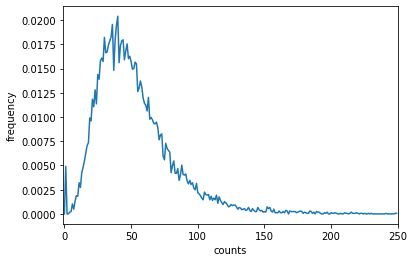

In [88]:
def integer_histogram(counts, normed=True, xlim=[], ylim=[],
                      *args, **kwargs):
    hist = np.bincount(counts)
    if normed:
        hist = hist / np.sum(hist)
    fig, ax = plt.subplots()
    ax.plot(np.arange(hist.size), hist, *args, **kwargs)
    ax.set_xlabel('counts')
    ax.set_ylabel('frequency')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

counts_arr = np.fromiter(counts.values(), dtype=int, count=len(counts))
integer_histogram(counts_arr, xlim=(-1, 250))

Notice the nice distribution of k-mer frequencies, along with a spike of very unique (small count) of k-mers at the left of the plot. Such low frequency k-mers are likely to be errors.

We can leverage Principal Component Analysis (PCA) and Latent Dirichlet Allocation (LDA) to continue this use case. 

## Speeding up a computation with cython

We're going to showcase NLP computations using the `spacy` package, which relies on `cython` to speed up computations. I got most of the code from [this](https://medium.com/huggingface/100-times-faster-natural-language-processing-in-python-ee32033bdced) post. So get to an anaconda prompt and install the package:
```(python)
pip install spacy
```

<br />
<center>
<img src="images/spacy.png" width=600 />
</center>

[Here's](https://spacy.io/usage) how to use spacy.

Now, suppose we have a large set of rectangles that we store as a list of Python objects, e.g. instances of a Rectangle class. The main job of our module is to iterate over this list in order to count how many rectangles have an area larger than a specific threshold.

<br />
<center>
<img src="images/mondrian.jpg" width=500 />
</center>

In [89]:
from random import random

class Rectangle:
    def __init__(self, w, h):
        self.w = w
        self.h = h
    def area(self):
        return self.w * self.h

def check_rectangles_py(rectangles, threshold):
    n_out = 0
    for rectangle in rectangles:
        if rectangle.area() > threshold:
            n_out += 1
    return n_out

def main_rectangles_slow():
    n_rectangles = 10000000
    rectangles = list(Rectangle(random(), random()) for i in range(n_rectangles))
    n_out = check_rectangles_py(rectangles, threshold=0.25)
    print(n_out)

In [90]:
%%time
# Let's run it:
main_rectangles_slow()

4036638
CPU times: user 11.6 s, sys: 904 ms, total: 12.5 s
Wall time: 12.5 s


The `check_rectangles()` function which loops over a large number of Python objects is the bottleneck.

Let's write it in [Cython](https://cython.org/). If you are really excited about this possibility, here are some [labs](https://alan-turing-institute.github.io/rsd-engineeringcourse/ch08performance/040cython.html).

We indicate the cell is a Cython cell by using the %%cython magic command. When the cell is run, the cython code will be written in a temporary file, compiled and reimported in the iPython space. The Cython code thus has to be self-contained.

But before, if your cython is version < **29.14**, ***uprade*** your cython:
```(python)
pip install --upgrade --user cython
```

Then, load the cython extension:

In [91]:
%load_ext Cython

To reload:
```(python)
%reload_ext Cython
```

Verify that your cython is version >= **29.14**:

In [92]:
import cython as c
c.__version__

'0.29.13'

If it isn't, then **run the following** on an anaconda prompt:
```(python)
pip install --upgrade --user cython
```
If the cell below fails, then **exit anaconda navigator** (or your notebook), restart, then reload the current notebook. Unfortunately, the C-engine needs to be restarted from scratch.

In [93]:
%%cython
from cymem.cymem cimport Pool

The `%%cython` magic command is what prompts the notebook to run the cell using the C engine. You need to add it to every cell you want to supercharge with C code.

In [94]:
%%cython
from cymem.cymem cimport Pool
from random import random

cdef struct Rectangle:
    float w
    float h

cdef int check_rectangles_cy(Rectangle* rectangles, int n_rectangles, float threshold):
    cdef int n_out = 0
    # C arrays contain no size information => we need to state it explicitly
    for rectangle in rectangles[:n_rectangles]:
        if rectangle.w * rectangle.h > threshold:
            n_out += 1
    return n_out

def main_rectangles_fast():
    cdef int n_rectangles = 10000000
    cdef float threshold = 0.25
    cdef Pool mem = Pool()
    cdef Rectangle* rectangles = <Rectangle*>mem.alloc(n_rectangles, sizeof(Rectangle))
    for i in range(n_rectangles):
        rectangles[i].w = random()
        rectangles[i].h = random()
    n_out = check_rectangles_cy(rectangles, n_rectangles, threshold)
    print(n_out)

In [95]:
%%time
main_rectangles_fast()

4035990
CPU times: user 441 ms, sys: 22 ms, total: 463 ms
Wall time: 463 ms


We are about ***20 times faster*** in Cython!

The ratio of improvement depends a lot on the specific syntax of the Python program. While the speed in Cython is rather predictible once your code make only use of C level objects (it is usually directly the fastest possible speed), the speed of Python can vary a lot depending on how your program is written and how much overhead the interpreter will add.

How can you be sure you Cython program makes only use of C level structures? Use the `-a` or `--annotate` flag in the `%%cython` magic command to display a code analysis with the line accessing and using Python objects highlighted in yellow.

In [96]:
%%cython -a
from cymem.cymem cimport Pool
from random import random

cdef struct Rectangle:
    float w
    float h

cdef int check_rectangles_cy(Rectangle* rectangles, int n_rectangles, float threshold):
    cdef int n_out = 0
    # C arrays contain no size information => we need to state it explicitly
    for rectangle in rectangles[:n_rectangles]:
        if rectangle.w * rectangle.h > threshold:
            n_out += 1
    return n_out

cpdef main_rectangles_fast():
    cdef int n_rectangles = 10000000
    cdef float threshold = 0.25
    cdef Pool mem = Pool()
    cdef Rectangle* rectangles = <Rectangle*>mem.alloc(n_rectangles, sizeof(Rectangle))
    for i in range(n_rectangles):
        rectangles[i].w = random()
        rectangles[i].h = random()
    n_out = check_rectangles_cy(rectangles, n_rectangles, threshold)
    print(n_out)

Click on a line that starts with a `+` to see the C code that Cython generated for it!

Here is an example of the previous cython program ***not optimized*** (with Python objects in the loop):

In [97]:
%%cython -a
from cymem.cymem cimport Pool
from random import random

cdef struct Rectangle:
    float w
    float h

cdef int check_rectangles_cy(Rectangle* rectangles, int n_rectangles, float threshold):
    # ========== MODIFICATION ===========
    # We changed the following line from `cdef int n_out = 0` to
    n_out = 0
    # n_out is not defined as an `int` anymore and is now thus a regular Python object
    # ===================================
    for rectangle in rectangles[:n_rectangles]:
        if rectangle.w * rectangle.h > threshold:
            n_out += 1
    return n_out

cpdef main_rectangles_not_so_fast():
    cdef int n_rectangles = 10000000
    cdef float threshold = 0.25
    cdef Pool mem = Pool()
    cdef Rectangle* rectangles = <Rectangle*>mem.alloc(n_rectangles, sizeof(Rectangle))
    for i in range(n_rectangles):
        rectangles[i].w = random()
        rectangles[i].h = random()
    n_out = check_rectangles_cy(rectangles, n_rectangles, threshold)
    print(n_out)

See how line 16 in the loop of check_rectangles_cy is ***highlighted***? This indicates that the Cython compiler had to add some Python API overhead.

The important point here is that lines that run in a loop (e.g. 11 to 13 in the optimized version) should not be highlighted, meaning they will be running at the fastest possible speed. It's ok to have yellow lines in the main_rectangle_fast function as this function will only be called once when we execute our program anyway. The yellow lines 22 and 23 in the optimized version are initialization lines that we could avoid by using a C level random function like `stdlib rand()`.

## Using the `spacy` package

The official [Cython documentation](https://cython.readthedocs.io/en/latest/) advises against the use of C strings: 
```(python)
Generally speaking: unless you know what you are doing, avoid using C strings where possible and use Python string objects instead.
```
`spaCy` allows us us overcome this problem by converting all strings to 64-bit hashes using a look up between Python unicode strings and 64-bit hashes called the **StringStore**, giving us access to fully populated C level structures of the document and vocabulary called **TokenC** and **LexemeC**,

The **StringStore** object is accessible from everywhere in `spaCy` and every object, e.g. as `nlp.vocab.strings`, `doc.vocab.strings` or `span.doc.vocab.string`:

<br />
<center>
<img src="images/spacy-nlp.png" width=600 />
</center>

Here is now a simple example of NLP processing, albeit with lotsa text, in Cython.

Let's build a list of big documents from `pytorch` data, and parse them using spaCy (this will take a few minutes).

First, just like with `nltk`, we need to download the already-built (english) model. **Open an anaconda prompt and run**:
```(python)
python -m spacy download en
```

Then run the following cell:

In [101]:
import urllib.request
import spacy

# Build a dataset of 10 parsed document extracted from the Wikitext-2 dataset
with urllib.request.urlopen('https://raw.githubusercontent.com/pytorch/examples/master/word_language_model/data/wikitext-2/valid.txt') as response:
   text = response.read()
nlp = spacy.load('en')
doc_list = list(nlp(text[:800000].decode('utf8')) for i in range(10))

In [102]:
sum(len(doc) for doc in doc_list)

1716200

We have about 1.7 million tokens (words) in our dataset!

Let's perform an NLP task on this dataset: Let's count the number of times the word `run` is used as a **noun** (not a verb) in the dataset (i.e. tagged with a "NN" Part-Of-Speech (POS) tag):

In [ ]:
def slow_loop(doc_list, word, tag):
    n_out = 0
    for doc in doc_list:
        for tok in doc:
            if tok.lower_ == word and tok.tag_ == tag:
                n_out += 1
    return n_out

def main_nlp_slow(doc_list):
    n_out = slow_loop(doc_list, 'run', 'NN')
    print(n_out)

In [ ]:
%%time
# quite slow!
main_nlp_slow(doc_list)

About one second on my ASUS STRIX Nvidia laptop. Let's try to speed this up with `spaCy` and `Cython`.

First, we have to think about the data structure. We will need a C level array for the dataset, with pointers to each document's **TokenC** array. We'll also need to convert the strings we use for testing to 64-bit hashes: "run" and "NN". When all the data required for our processing is in C level objects, we can then iterate at full C speed over the dataset.

In [ ]:
import spacy as sp
sp.__version__

In [ ]:
%%cython -+
import numpy
from spacy.tokens.doc cimport Doc

Unfortunately, I have a problem with my `cimport` above, which makes the code below moot. I have not been able to fix this :-( If ***you*** can, let me know, i'll give you bonus hw points :-)

In [ ]:
%%cython -+
#import numpy # Sometime we have a fail to import numpy compilation error if we don't import numpy
from cymem.cymem cimport Pool
from spacy.tokens.doc cimport Doc
from spacy.typedefs cimport hash_t
from spacy.structs cimport TokenC

cdef struct DocElement:
    TokenC* c
    int length

cdef int fast_loop(DocElement* docs, int n_docs, hash_t word, hash_t tag):
    cdef int n_out = 0
    for doc in docs[:n_docs]:
        for c in doc.c[:doc.length]:
            if c.lex.lower == word and c.tag == tag:
                n_out += 1
    return n_out

cpdef main_nlp_fast(doc_list):
    cdef int i, n_out, n_docs = len(doc_list)
    cdef Pool mem = Pool()
    cdef DocElement* docs = <DocElement*>mem.alloc(n_docs, sizeof(DocElement))
    cdef Doc doc
    for i, doc in enumerate(doc_list): # Populate our database structure
        docs[i].c = doc.c
        docs[i].length = (<Doc>doc).length
    word_hash = doc.vocab.strings.add('run')
    tag_hash = doc.vocab.strings.add('NN')
    n_out = fast_loop(docs, n_docs, word_hash, tag_hash)
    print(n_out)

In [ ]:
%%time
main_nlp_fast(doc_list)

Here's some more cool NLP with `spaCy`:

In [ ]:
doc = nlp("The big grey dog ate all of the chocolate, but fortunately he wasn't sick!")
doc.text.split()

Each token’s `.orth_` method returns a string representation of the token rather than a `spaCy` token object (`.orth` method):

In [ ]:
[token.orth_ for token in doc]

If you want to avoid returning tokens that are punctuation or white space, SpaCy provides convienence methods for this (as well as many other common text cleaning tasks — for example, to remove stop words you can call the `.is_stopmethod`):

In [ ]:
[token.orth_ for token in doc if not token.is_punct | token.is_space] 

Here's **lemmatization**:

In [ ]:
[word.lemma_ for word in doc] 

## POS tagging

Here's an example of Part-of-Speech (POS) tagging with `spacy`:

In [ ]:
wiki_obama = """Barack Obama is an American politician who served as 
the 44th President of the United States from 2009 to 2017. He is the first  
African American to have served as president, as well as the first born outside the contiguous United States.""" 

nlp_obama = nlp(wiki_obama) 

pos_tags = [(i, i.tag_) for i in nlp_obama]
pos_tags

In [ ]:
doc2 = nlp("Conor's dog's toy was hidden under the man's sofa in the woman's house")

pos_tags = [(i, i.tag_) for i in doc2]
pos_tags

By exploiting possessives, we can determine who owns what (providing the text is grammatically sound). SpaCy uses the popular [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) POS tags. With SpaCy you can access coarse and fine-grained POS tags with the .pos_ and .tag_ methods, respectively (here we access the fine grained POS tag).

You can see that the `’s` tokens above are labelled as **POS**. This is how you can exploit this tag to extract the **owner** and the **object** they own:

In [ ]:
owners_possessions = [] 
for i in pos_tags: 
    if i[1] == "POS":
        owner = i[0].nbor(-1) 
        possession = i[0].nbor(1) 
        owners_possessions.append((owner, possession))
owners_possessions 

Nice! ***That's*** NLP!

Here's an example of **named entity recognition** with `spacy`. 

>**NAMED ENTITY RECOGNITION**: the process of classifying named entities found in a text into pre-defined categories, such as persons, places, organizations, dates, etc. spaCy uses a statistical model to classify a broad range of entities, including persons, events, works-of-art and nationalities / religions (see [documentation](https://spacy.io/docs/usage/entity-recognition) for the full list).

In [ ]:
[(i, i.label_, i.label) for i in nlp_obama.ents] 

It is not uncommon in NLP tasks to want to split a document into sentences. It is simple to do this with `spaCy` by accessing a Doc's .sents method:

In [ ]:
for ix, sent in enumerate(nlp_obama.sents, 1): 
    print("Sentence number {}: {}".format(ix, sent))

Find more interesting project ideas with `spaCy` [here](https://spacy.io/usage/processing-pipelines#_title).

<a id='section3'></a>

## Notebook Contents:
- Part 1: [Introduction to Natural Language Processing (NLP)](#section1)
- Part 2: [Big Data processing: Optimizations often required for NLP](#section2)
- Part 3: [NLP with the Reuters dataset](#section3)
- Part 4: [Words 2 Vectors](#section4)
- Part 5: [NLP-ing Litterature](#section5)

# Part 3: NLP with the Reuters dataset


</br >
<center>
<img src="images/wordcloud.png" width=600 />
</center>

Microsoft's [NLTK](https://en.wikipedia.org/wiki/Natural_Language_Toolkit) (Natural Language Toolkit) is one of the better HLP frameworks and has many popular corpora available for download directly from the API. Let's use the Brown and Reuters corpora. 

Make sure the line `nltk.download()` below is ***uncommented*** (i.e. will run). Run the cell, this will produce a dialog prompting you what to download (I hope). Navigate to the `corpora` tab, and download `Brown`, `reuters`, and `stopwords`, then go to the `Models` tab and download `punkt`. Then comment the `nltk.download()` line out again, so if you rerun the cell below you won't have to do the downloads again. 

Then go to your corpora folder, and unzip the reuters folder if unzipped (in the same folder). For some reason, it did not automatically unzip on my machine.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
#nltk.download()

The [Reuters corpus](https://martin-thoma.com/nlp-reuters/) is a collection of more than 10,000 news documents published in 1987 and categorized into 90 different topics. The corpus contains over 1.3 million words in total.

NLTK's feature set is focused more on the linguistic aspect of natural language processing than the machine learning aspect, with functions for tasks such as tokenization, stemming, tagging, and parsing. Even so, there are some very useful functions we can take advantage of to get a sense of what's in this corpus.  Let's start by tabulating the number of unique words in the corpus. 

In [ ]:
from nltk.corpus import reuters
len(reuters.words())

In [ ]:
vocabulary = set(reuters.words())
len(vocabulary)

In [ ]:
len(reuters.sents())

In [ ]:
len(reuters.paras())

In [ ]:
len(reuters.categories())

In [ ]:
reuters.readme()

In [ ]:
reuters.paras()[3]

In [ ]:
one_l = reuters.paras()[3][0]
one_l

In [ ]:
one = ' '.join(reuters.paras()[0][0])
one

Getting the first word in the subject:

In [ ]:
for i, ele in enumerate(one_l): 
    if any(c in "abcdefghijklmnopqrstuvwxyz" for c in ele):
        print(i, ele)
        break

Separating title and subject:

In [ ]:
for i, ele in enumerate(one_l): 
    if any(c in "abcdefghijklmnopqrstuvwxyz" for c in ele):
        end_of_subject = i
        break
print(' '.join(one_l[0:end_of_subject]))
print(' '.join(one_l[end_of_subject:])) 

Doing this for every post:

In [ ]:
items = dict()

for p in reuters.paras():
    # build subject
    first_sentence = p[0]
    end_of_subject = 0
    for i, ele in enumerate(first_sentence): 
        if any(c in "abcdefghijklmnopqrstuvwxyz" for c in ele):
            end_of_subject = i
            break
    subject = ' '.join(first_sentence[0:end_of_subject])
    body = ' '.join(first_sentence[end_of_subject:])
    # complete with rest of body
    for s in p[1:]:
        body += ' '.join(s)
    # buld dictionary
    items[subject] = body
    
print(list(items.keys())[0])
print(list(items.values())[0])

In [ ]:
print(list(items.keys())[1])
print(list(items.values())[1])

In [ ]:
import pandas as pd
reuters_df = pd.DataFrame.from_dict(items, orient='index')
reuters_df.head()

In [ ]:
len(reuters_df[0])

In [ ]:
vocabulary = set(reuters.words())
len(vocabulary)

We saw that there are 41,600 unique tokens in the corpus.  This doesn't tell us anything about the distribution of these tokens though.  NLTK has a built-in function to compute a frequency distribution for a text corpus.

In [ ]:
fdist = nltk.FreqDist(reuters.words())
print(fdist)

In [ ]:
fdist.most_common(30)

Plot these cumulatively to get a sense for how much of the corpus they represent.

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot(30, cumulative=True)

Just 30 tokens make up around 35% of the entire corpus!  Moreover, most of these are things like punctuation and articles such as `and`, `to`, `of` and so on.  This is useful to know as we may want to strip out tokens like these.  You might also notice that the word 'the' appears on the list twice.  That's because the corpus contains both upper-case and lower-case words, and they are each counted separately.  Before we attempt to do anything with this data we'll need to correct these issues. The cell below will take a good minute to run, so please be patient.

In [ ]:
stopwords = nltk.corpus.stopwords.words()
cleansed_words = [w.lower() for w in reuters.words() if w.isalnum() and w.lower() not in stopwords]
vocabulary = set(cleansed_words)
len(vocabulary)

After converting everything to lowercase, removing punctuation, and removing **stop words** using a pre-defined list of words that do not add any semantic value, we've reduced the vocabulary from almost 42,000 to just over 30,000.  

Note that we still didn't address things like singular vs. plural being different words. To handle this we'd have to get into topics like stemming, but for now let's leave as-is. Let's look at the top 30 again.

In [ ]:
fdist = nltk.FreqDist(cleansed_words)
fdist.most_common(30)

The list is more interesting now!  There's a lot more that we could do with NLTK, but since we're interested in using this data to build statistical models, we need to find ways to "vectorize" this data.  

Recall from our first lecture that one common way to represent text data is called "bag of words" (BOW) representation.  

A bag of words represents each document in a corpus as a series of features that ask a question about the document.  Most commonly, the features are the collection of all distinct words the vocabulary of the entire corpus.  The values are usually either binary (representing the presence or absence of that word in the document) or a count of the number of times that word appears in the document.  A corpus is then represented as a matrix with one row per document and one column per unique word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer

We'll start off using `scikit-learn`'s `CountVectorizer` class to transform our corpus into a **sparse** bag of words representation. This uses `scipy`'s sparse matrix calculus. `CountVectorizer` expects as input a list of raw strings containing the documents in the corpus.  It takes care of tokenization, transformation to lowercase, filtering stop words, building the vocabulary etc.  It also tabulates occurrance counts per document for each feature.

Since `CountVectorizer` expects raw data as input, rather than the pre-processed data we were working with in NLTK, we need to create a list of documents to pass to the vectorizer.

In [ ]:
files = [f for f in reuters.fileids() if 'training' in f]
corpus = [reuters.raw(fileids=[f]) for f in files]
len(corpus)

Let's explore..

In [ ]:
corpus[3211]

Now we have the training corpus defined as a list of raw text documents.  We can pass this to our vectorizer to build our bag of words *matrix*.

In [ ]:
X = vectorizer.fit_transform(corpus)
X

The vectorizer stores the data as a sparse matrix since a dense matrix would use way too much space and most of the values would be zero anyway (because each document only contains a small number of the total words in the vocabulary). 

X is very similar to the matrix we built last lecture, so we're not going to explore it anymore. You see, data science all comes down to translating nodes/words/etc. into *numbers* (vectors, to be exact), so we can use **math** on the data. It's not about the software packages you use, it's *about the math algorithms*. 

We can transform X to a numpy array if necessary though, with:
```python
X.toarray()
```

In [ ]:
X.toarray()


The vectorizer stores the feature names (words) that map to the matrix column indexes.  We can inspect those if desired.  Note that we're skipping to index 2000 with a python slice because if you look at the beginning of the index, it's all numbers.  The reuters corpus, being news articles, contains quite a high volume of numeric symbols.  It's debatable whether or not we should really include these in the vocabulary, but for now they're there.

In [ ]:
vectorizer.get_feature_names()[4000:4100]

One potential issue with this representation is that it holds an in-memory mapping of the vocabulary-to-document-matrix that can get unwieldy on large datasets.  This approach also doesn't work when training in an on-line fashion since it needs to build the entire vocabulary *ahead* of time.  

There's another vectorization algorithm implemented in scikit-learn that uses *feature hashing* to build the matrix in a *stateless* manner.  This `HashingVectorizer` class solves both of the above problems, however it comes with some tradeoffs - it's not possible to "inverse transform" the vector back to the original words, and there's a possibility of *collisions* that could cause some information to be lost.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X_hash = hv.transform(corpus)
X_hash

But let's continue using our `CountVectorizer`. Keep in mind that for very large corpora `HashingVectorizer` would be faster and more efficient.

We now have a bag of words matrix, however there's another problem - some words appear much more frequently across the corpora as a whole than other words, so their presence in a document should carry less weight than a word that is very infrequent in general.  To adjust for this, we'll use **TF-IDF weighting**.  

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

In [ ]:
X_weighted = tfidf.fit_transform(X)
X_weighted.toarray()

Now that we have a weighted term-document matrix, let's do something with it.  A common NLP task is to classify documents as belonging to a particular category.  Since the `reuters` corpus is labeled (categorized by humans), we can used a supervised learning algorithm to attempt to learn how to categorize similar news articles.

To do this we need a few additional pieces of information.  We need a set of labels, and we need a test set to evaluate performance of the model.  Fortunately we have both available to us for the `reuters` dataset.

In [ ]:
# build the term-document matrix for the test set using the existing transforms
test_files = [f for f in reuters.fileids() if 'test' in f]
test_corpus = [reuters.raw(fileids=[f]) for f in test_files]
X_test = vectorizer.transform(test_corpus)
X_test_weighted = tfidf.transform(X_test)

# get the categories for each document in both the train and test sets
train_labels = [reuters.categories(fileids=[f]) for f in files]
test_labels = [reuters.categories(fileids=[f]) for f in test_files]

Since there are 90 distinct categories (document `cats.txt` in `reuters`), and each document can be assigned to more than one category, we probably don't have enough documents per category to build a really good document classifier.  We're going to simplify the problem a bit and reduce the classification to a binary problem - wether or not the document belongs to the 'gold' category.

In [ ]:
y = np.asarray([1 if 'gold' in label else 0 for label in train_labels])
y_test = np.asarray([1 if 'gold' in label else 0 for label in test_labels])

In [ ]:
X_weighted.shape, y.shape, X_test_weighted.shape, y_test.shape

## Supervised Learning

Now we're ready to train a classifier.  We'll stick with (multinomial) Naive Bayes.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# train the classifier
classifier = MultinomialNB()
classifier.fit(X_weighted, y)

# predict labels for the test set
predictions = classifier.predict(X_test_weighted)

# output the classification report
label_names = ['not gold', 'gold']
print(classification_report(y_test, predictions, target_names=label_names))

So precision and f-score are ill-defined, which means we don't really have enough data to train. There are too few articles about `gold`. Let's try a different category. How about `earn`?



In [ ]:
y = np.asarray([1 if 'earn' in label else 0 for label in train_labels])
y_test = np.asarray([1 if 'earn' in label else 0 for label in test_labels])

In [ ]:
X_weighted.shape, y.shape, X_test_weighted.shape, y_test.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# train the classifier
classifier = MultinomialNB()
classifier.fit(X_weighted, y)

# predict labels for the test set
predictions = classifier.predict(X_test_weighted)

# output the classification report
label_names = ['not earn', 'earn']
print(classification_report(y_test, predictions, target_names=label_names))

Ok so that's better, although the recall is not as high as we would like it to be.  There are a number of ways we could work to improve this result, such as experimenting with removing extraenous tokens such as numbers from our vocabulary or constructing additional high-level features about the documents.  For a simple bag-of-words model though it's not too bad.

## Unsupervised Learning

Supervised learning is nice when we have a *labeled* dataset, but the vast majority of text in the wild does not come with any sort of label so its usefulness in natural language processing is often limited.  

What about *unsupervised techniques* to categorize documents? 

In a Machine Learning class, you will learn the difference between **recommendation**, **classification**, and **clustering**, the main categories of Machine Learning.

Scikit-learn packages a decomposition technique called `non-negative matrix factorization` (NMF) that we can use for topic extraction.

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10).fit(X_weighted)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % topic_idx)
    print(' '.join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print('')

The above output takes the components derived from the factorization (here assumed to model a **topic** from the corpus) and extracts the 20 words that most significantly contributed to that topic.  Although it's not perfect, we can see some commonalites among the groups of words.

NMF gives some interesting results, but there are more advanced algorithms for topic modeling. [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA) is a technique that models documents as though they are composed of some undefined number of topics. Each of the words in the document are then said to be attributed to some combination of those topics. LDA is the equivalent of k-means for NLP. 

`Scikit-learn` does [implement](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) LDA, but there's a library called [gensim](https://en.wikipedia.org/wiki/Gensim), by [Radim Rehurek](https://radimrehurek.com/gensim/install.html), that I researched 2 years ago and really liked. So we'll study *that* in the next section.

<a id='section4'></a>

## Notebook Contents:
- Part 1: [Introduction to Natural Language Processing (NLP)](#section1)
- Part 2: [Big Data processing: Optimizations often required for NLP](#section2)
- Part 3: [NLP with the Reuters dataset](#section3)
- Part 4: [Words 2 Vectors](#section4)
- Part 5: [NLP-ing Litterature](#section5)

# Part 4: Words 2 Vectors

>**WORD EMBEDDINGS**: A word embedding $W:words→R^nW$ is a parametrized function mapping words in some language to high-dimensional **vectors** (e.g 500 dimensions).
For example, we might find: $W(\text{cat})=(0.2, -0.4, 0.7, ...)$ and $W(\text{mat})=(0.0, 0.6, -0.1, ...)$
Typically, the function is a lookup table, parameterized by a matrix $\Theta$ with a row-vector for each word: $W_θ(w_n)=θ_n$. The matrix $W$ is initialized to have random vectors for each word. It then learns to have **meaningful** vectors in order to perform some task.

</br >
<center>
<img src="images/gensim.png" width=600 />
</center>

The [gensim](https://en.wikipedia.org/wiki/Gensim) python package, by [Radim Rehurek](https://radimrehurek.com/gensim/install.html) is focused on [**topic modeling**](https://en.wikipedia.org/wiki/Topic_model). Google has a similar library, called [word2vec](https://en.wikipedia.org/wiki/Word2vec), and Stanford another similar one called [GloVe](https://en.wikipedia.org/wiki/GloVe_(machine_learning)), but I think the one-man library gensim is *better*!

First, open your Anaconda prompt and run:
```python
pip install gensim
```

or:

```python
conda install -c conda-forge gensim
```
If that doesn't work (it should), run:
```python
pip install --upgrade gensim
```

To start off we need our corpus in a format that gensim models can use as input. Gensim implements a lot of the same transforms that we just applied to the data, but rather than re-create the same transforms, we can re-use what we've already done and convert our term-document matrix into gensim's expected format, by levevraging our TF-IDF X_weighted matrix.

In [ ]:
from gensim import corpora, models, similarities, matutils

# create the corpus using a conversion utility
gensim_corpus = matutils.Sparse2Corpus(X_weighted)

# build the LDA model
lda = models.LdaModel(gensim_corpus, num_topics=100)
lda

With our LDA model we can now examine the words that most contribute to each topic (as we did with NMF), or we can compare *new* documents to the model to identify either the topics that make up that document or the existing documents that they are most similar to. E.g. spam? 

But let's move on from NMF/LDA to another algorithm implemented in gensim called **word2vec**.  Word2vec is an **nsupervised neural network** model that runs on a corpus of text and learns vector representations for the individual words in the text. The word vectors are modeled in a way such that words that are **semantically close** to each other are also close in the vector space, so neighbors in the vector space equates to similar semantics. 

***Amazing*** how vector space context maps to semantic similarity! That is what fascinated me about word2vec (which Google actually uncovered first with their version of `word2vec`).

Let's explore some of the implications on the reuters dataset. Since word2vec expects a list of sentences as input, we'll need to go back to the pre-transformed sentence list provided by NLTK.

In [ ]:
model = models.Word2Vec(reuters.sents(), size=100, window=5, min_count=5, workers=4)

We now have a trained word2vec model.  It's possible to look at the vector for a word directly, although it won't mean much to you:
```python
model['market']
```

Now, every word in the vocabulary has a vector representation!

Since we're dealing with vectors, it's possible to compare words using vector math such as `cosine similarity`.

In [ ]:
model.similarity('dollar', 'yen')

In [ ]:
model.similarity('dollar', 'potato')

According to the model, `dollar` and `yen` are much more similar to each other (both being currencies) than `dollar` and `potato`.  

Right?

The relationship is ***deeper*** than just a similarity measure though! The word2vec model is capable of capturing abstract concepts as well.  The ubiquitous example is `woman + king - man = queen`.  When properly trained on a large enough amount of text, the model is able to detect that the relationship between `woman` and `queen` is similar to the relationship between `man` and `king`!

<br />
<center>
<img src="images/wow.jpg" width=400 />
</center>

Let's see if the model we just trained can do something similar.

In [ ]:
model.most_similar(positive=['Japan', 'dollar'], negative=['US'])

Although (deutsche) `mark`, (pound) `sterling`, and (japanese) `yen` are on the list, there's some noise too, like `back`, `fall`, `further`, and `levels`.  This is mostly likely due to the relatively small size of the dataset.  Word2vec needs a **huge** amount of training data to work really well, and that's a problem inherent to ANNs. 

Some parameter tuning might help too - for example, a size of 100 dimensions might be way too big for the amount of data in the reuters dataset.

Let's see if there's a way to visualize some of the information captured by the model. Since the vectors are high-dimensional we can't visualize them directly, but we can apply a dimension reduction technique like PCA and use the first two principal components as coordinates.  We can try this with a group of words that should be somewhat similar, such as countries.

In [ ]:
from sklearn.decomposition import PCA

# we use 'Soviet' instead of 'Russia' because reuters is an old dataset
words = ['US', 'China', 'Japan', 'England', 'France', 'Germany', 'Soviet']
word_vectors = [model[word] for word in words]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

There's a spread between some words, but a few such as `US` and `China` are very close. 

But semantic positioning does not make as much sense in the absolute, We need to include different semantic categories. So let's introduce 4 semantic categories: **Countries**, **currencies**, **finances**, and **oil**. 

In [ ]:
from sklearn.decomposition import PCA

# we use 'Soviet' instead of 'Russia' because reuters is an old dataset
words = ['US', 'China', 'Japan', 'England', 'France', 'Germany', 'dollar', 'yen', 'mark', 'sterling', 'stock', 'company', 'dividend', 'shares', 'oil', 'pumping']
word_vectors = [model[word] for word in words]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

We see that **Countries** (and strangely, **oil**) are all well grouped together! **Financial** terms carve out their own region of space, and **currencies** another.

Do not forget that we only plotted ***2*** PCA vectors, so we could visualize in 2D.

Terms with more correct, closer semantic positioning may have appeared frequently in the corpus, so there may have been a larger amount of training data for them, too.  

The results become more interesting when applied to very large datasets, and indeed Google and others have done just that. 

This is a 2D projection of a larger dataset from my bigdata lecture series, with more terms plotted:

<br />
<center>
<img src="images/word2vec.png" width=950 />
</center>

and this is zooming in on a region:

<br />
<center>
<img src="images/word2vec2.png" width=950 />
</center>

Isn't it amazing how a machine-learning algotihm figured out that `dancing` and `singing` makes me happy? And how did it figure this out? Simple, by listening to my blog posts. I often cite words related to `happy` when I talk about `dancing` and `singing`, because.. dancing and singing ***make me happy***! So all a computer needs to do is to read what I say and classify!

## Latent Dirichlet Allocation (LDA)

Word embeddings (word2vec) are used in statistical language translation, because words with similar meaning but in different languages map to the same region in vector space.

So applying this methodology to words is only the beginning.  It's already been extended to phrases and even entire documents.  It's a very promising research area and why I got so excited researching this 2 years ago.

So now we need to learn about [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA).

LDA is a great way for obtaining synoptical document semantics. It's a kind of unsupervised classification. It was first proposed by J. K. Pritchard, M. Stephens and P. Donnelly in 2000, in the context of machine learning.

>**DEFINITION**: LDA is a **generative statistical model** that allows sets of observations to be explained by **unobserved groups** (**latent**) that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.

For example, assuming there are 4 reasons Hillary lost the elections, what are those reasons based on all emails gathered from national correspondents?

Here's a (good) classical layman's description of the LDA algorithm. It should immediately remind you of **k-means**!
>**ALGORITHM (LDA)**: Suppose you’ve just moved to a new city. You’re a hipster and an anime fan, so you want to know where the other hipsters and anime geeks tend to hang out. Of course, as a hipster, you know you can’t just ask, so what do you do?

>Here’s the scenario: you scope out a bunch of different establishments (documents) across town, making note of the people (words) hanging out in each of them (e.g., Alice hangs out at the mall and at the park, Bob hangs out at the movie theater and the park, and so on). Crucially, you don’t know the typical interest groups (topics) of each establishment, nor do you know the different interests of each person.

>So you pick some number K of categories to learn (i.e., you want to learn the K most important kinds of categories people fall into), and start by making a guess as to why you see people where you do. For example, you initially guess that Alice is at the mall because people with interests in X like to hang out there; when you see her at the park, you guess it’s because her friends with interests in Y like to hang out there; when you see Bob at the movie theater, you randomly guess it’s because the Z people in this city really like to watch movies; and so on.

>Of course, your random guesses are very likely to be incorrect (they’re random guesses, after all!), so you want to improve on them. One way of doing so is to:

>Pick a place and a person (e.g., Alice at the mall).
Why is Alice likely to be at the mall? Probably because other people at the mall with the same interests sent her a message telling her to come.
In other words, the more people with interests in X there are at the mall and the stronger Alice is associated with interest X (at all the other places she goes to), the more likely it is that Alice is at the mall because of interest X.
So make a new guess as to why Alice is at the mall, choosing an interest with some probability according to how likely you think it is.
Go through each place and person over and over again. Your guesses keep getting better and better (after all, if you notice that lots of geeks hang out at the bookstore, and you suspect that Alice is pretty geeky herself, then it’s a good bet that Alice is at the bookstore because her geek friends told her to go there; and now that you have a better idea of why Alice is probably at the bookstore, you can use this knowledge in turn to improve your guesses as to why everyone else is where they are), and eventually you can stop updating. Then take a snapshot (or multiple snapshots) of your guesses, and use it to get all the information you want:

Note that there is another technique called [non-negative matrix factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) (NMF) that strongly resembles Latent Dirichlet Allocation (LDA), where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Whereas LDA is a **probabilistic model** capable of expressing uncertainty about the placement of topics across texts and the assignment of words to topics, NMF is a **deterministic algorithm** which arrives at a single representation of the corpus (and for this reason, NMF is often characterized as a machine learning algorithm). Like LDA, NMF arrives at its representation of a corpus in terms of something resembling **latent topics**.

Now, let's go back to our reuters dataset and do **LDA** on it!

>**WARNING**: The `nlp` of the reuters dataset took 3 minutes on my laptop. Caveat Emptor (you may want to do this at home if your laptop is not data science-strong).

In [ ]:
len(reuters_df[0])

In [ ]:
texts = reuters_df[0]
%time reuters_docs = list(nlp.pipe(texts))

Now that we have a list of spaCy documents, we transform them to lists of tokens. Instead of the original tokens, we're going to work with lemmas instead. This will allow our model to generalize better, as it will be able to see that "traded" and "trade" are actually just two forms of the same words. This is the full list of our initial preprocessing steps:

- We remove all words shorter than 3 characters (these are often fairly uninteresting from a topical point of view),
- We drop all stopwords, and
- We take them lemmas of the remaining words and lowercase them.

In [ ]:
docs = [[t.lemma_.lower() for t in doc if len(t.orth_) > 3 and not t.is_stop] for doc in reuters_docs]
print(docs[:3])

Next, we also want to take frequent bigrams into account. After all, if you;re from New England, "Tom Brady" is not the same thing as "Tom", nor "Brady". Let's use `Gensim` for this!

First we identify the frequent bigrams in the corpus, then we append them to the list of tokens for the documents in which they appear. This means the bigrams will not be in their correct position in the text, but that's fine: topic models are bag-of-word models that ignore word position anyway.

In [ ]:
import re
from gensim.models import Phrases

bigram = Phrases(docs, min_count=10)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:  # bigrams can be recognized by the "_" that joins the invidual words
            docs[idx].append(token)

In [ ]:
len(docs)

In [ ]:
docs[0]

Next, we move on to the final Gensim-specific preprocessing steps. 

First, we create a dictionary representation of the documents. This dictionary will map each word to a unique ID and help us create **bag-of-word** representations of each document. These bag-of-word representations contain the ids of the words in the document, together with their frequency. Additionally, we can remove the least and most frequent words from the vocabulary. This improves the quality of our topic model and speeds up its training. The minimum frequency of a word is expressed as an absolute number, the maximum frequency is the proportion of documents a word is allowed to occur in.

In [ ]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
print('Number of unique words in original documents:', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Number of unique words after removing rare and common words:', len(dictionary))

print("Example representation of document 1:", dictionary.doc2bow(docs[0]))

In [ ]:
print("Example representation of document 2:", dictionary.doc2bow(docs[1]))

Then we create bag-of-word representations for each document in the corpus:

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

## Training
Now it's time to train our topic model. We do this with the following parameters:

- corpus: the bag-of-word representations of our documents
- id2token: the mapping from indices to words
- num_topics: the number of topics we want the model to identify
- chunksize: the number of documents the model sees for every update
- passes: the number of times we show the total corpus to the model during training
- random_state: we use a seed to ensure reproducibility.
- On a corpus of this size, the training will typically take one or two minutes.

In [ ]:
from gensim.models import LdaModel

%time model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, chunksize=1000, passes=5, random_state=1)

## Results
We see that each reuters document is a combination of topics, and that the main topics in the corpus are themselves a (latent) mix of keywords.

Let's take a look at what the model has learnt, by printing out the ten words that are most characteristic for each of the topics. 

This shows some interesting patterns already: while some topics are more general (such as 7), others point to some very relevant recurring themes: energy production (topic 1), world economy (topic 3), financials (topic 4), and banking (topic 8).

In [ ]:
for (topic, words) in model.print_topics():
    print(topic+1, ":", words)

Another way of inspecting the topics is by visualizing them. 

This can be done with the `pyLDAvis` library. `PyLDAvis` will show us how popular the topics are in our corpus, how similar the topics are, and which are the most salient words for this topic. 
```(python)
pip install PyLDAvis
```

Note it's important to set `sort_topics=False` on the call to `pyLDAvis`. If you don't, it will order the topics differently than Gensim.

>**WARNING**: Try this at home. It will take a loooooooooooooooooong time..

In [ ]:
import pyLDAvis.gensim
import warnings

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

Hover over every one of gensim's 10 LDA latent decompositions to see what proportion of words it's constituted by.

Finally, let's inspect the topics the model recognizes in some of the individual documents. Here we see how LDA tends to assign a high probability to a low number of topics for each documents, which makes its results very interpretable.

In [ ]:
for (text, doc) in zip(texts[:10], docs[:10]):
    print(text)
    print([(topic+1, prob) for (topic, prob) in model[dictionary.doc2bow(doc)] if prob > 0.1])

## Conclusion

Many collections of unstructured texts don't come with any labels. Topic models such as **Latent Dirichlet Allocation** (LDA) are a useful technique to discover the most prominent topics in such documents. 

`Gensim` makes training these topics model ***easy***, and `pyLDAvis` presents the results in a visually attractive way. 

Together, `gensim` and `pyLDAvis` form a powerful toolkit to better understand what's ***inside*** large sets of documents, and to explore subsets of related texts. 

While these results are often very revealing already, it's also possible to **use them as a starting point, for example for a labelling exercise for *supervised* text classification**. 

<a id='section5'></a>

## Notebook Contents:
- Part 1: [Introduction to Natural Language Processing (NLP)](#section1)
- Part 2: [Big Data processing: Optimizations often required for NLP](#section2)
- Part 3: [NLP with the Reuters dataset](#section3)
- Part 4: [Words 2 Vectors](#section4)
- Part 5: [NLP-ing Litterature](#section5)

# Part 5: NLP-ing Litterature

Treating texts as a list of word frequencies (i.e. a vector) allows us to use all the mathematical tools we developed in class: From linear algebra to GPs. I wanted to also spend some time on less structured texts, because some of you may choose, like I did with your midterm, to analyze litterature.

<br />
<center>
<img src="images/sense-sensibility-2.jpg" width=600 />
</center>

So let's use texts by [Jane Austen](https://en.wikipedia.org/wiki/Jane_Austen) and [Charlotte Brontë](https://en.wikipedia.org/wiki/Charlotte_Bront%C3%AB), downloaded from [project Gutenberg](https://www.gutenberg.org/). Jane and Charlotte wrote very seminal english romances that were made into movies, such as [Sense and sensibility](https://en.wikipedia.org/wiki/Sense_and_Sensibility).

## Count Vectorization

In [ ]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
filenames = ['data/austen-brontë/Austen_Emma.txt',           
             'data/austen-brontë/Austen_Pride.txt',          
             'data/austen-brontë/Austen_Sense.txt',          
             'data/austen-brontë/CBronte_Jane.txt',          
             'data/austen-brontë/CBronte_Professor.txt',     
             'data/austen-brontë/CBronte_Villette.txt']      
                                                             
vectorizer = CountVectorizer(input='filename')               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 

In [ ]:
vocab_list = vectorizer.get_feature_names()
vocab_list[1000:1010]

Now we have a **document-term matrix** and a **vocabulary list**. 

Before we query the matrix and find out how many times the word
'love' occurs in `Austen_Emma` (the first book in `filenames`), we need to
convert this matrix from a [sparse
matrix](http://docs.scipy.org/doc/scipy/reference/sparse.html) into a
normal NumPy array. 

We will also convert `vocab`, a list of vocabulary, to an array of strings, as an array supports a greater variety of
operations.

In [ ]:
type(dtm)

In [ ]:
dtm.shape

In [ ]:
vocab = np.array(vocab_list)
type(vocab)

In [ ]:
len(vocab)

The first file, indexed by 0 in Python, is **Austen_Emma**
```(python)
filenames[0] == 'data/austen-brontë/Austen_Emma.txt'
````
How many times the word `love` occurs in the first file?

In [ ]:
# use the standard Python list method index(...)                    
love_idx = vocab_list.index('love')                               
dtm[0, love_idx]                                                   

In [ ]:
# alternatively, use NumPy indexing                                 
dtm[0, vocab == 'love']  

Let's verify that this is the right result:

In [ ]:
vocab[love_idx]

In [ ]:
n, _ = dtm.shape
dist = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        x, y = dtm[i, :], dtm[j, :]
        dist[i, j] = np.sqrt(np.sum((x - y)**2))

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
np.round(dist, 1)

In [ ]:
# *Pride and Prejudice* is index 1 and *Jane Eyre* is index 3
filenames[1] == 'data/austen-brontë/Austen_Pride.txt'
filenames[3] == 'data/austen-brontë/CBronte_Jane.txt'

# the distance between *Pride and Prejudice* and *Jane Eyre*
dist[1, 3]

In [ ]:
# which is greater than the distance between *Jane Eyre* and *Villette* (index 5)
dist[1, 3] > dist[3, 5]

And if we want to use a measure of distance that takes into consideration the length of the novels (an excellent idea), we can calculate the cosine similarity by importing sklearn.metrics.pairwise.cosine_similarity and use it in place of euclidean_distances.

Keep in mind that cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (as it is the cosine of the angle between the two vectors). In order to get a measure of distance (or dissimilarity), we need to “flip” the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

In [ ]:
# the distance between *Pride and Prejudice* (index 1) and *Jane Eyre* (index 3) is
dist[1, 3]

In [ ]:
# which is greater than the distance between *Jane Eyre* and *Villette* (index 5)
dist[1, 3] > dist[3, 5]

It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in scikit-learn

In [ ]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [ ]:
%matplotlib inline
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

In [ ]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

## Clustering texts based on distance

Clustering texts into discrete groups of similar texts is often a useful exploratory step. For example, a researcher may be wondering if certain textual features partition a collection of texts by author or by genre. Pairwise distances alone do not produce any kind of classification. To put a set of distance measurements to work in classification requires additional assumptions, such as a definition of a group or cluster.

The ideas underlying the transition from distances to clusters are, for the most part, common sense. Any clustering of texts should result in texts that are closer to each other (in the distance matrix) residing in the same cluster. There are many ways of satisfying this requirement; there no unique clustering based on distances that is the “best”. One strategy for clustering in circulation is called Ward’s method. Rather than producing a single clustering, Ward’s method produces a hierarchy of clusterings, as we will see in a moment. All that Ward’s method requires is a set of pairwise distance measurements–such as those we calculated a moment ago. Ward’s method produces a hierarchical clustering of texts via the following procedure:

Start with each text in its own cluster
Until only a single cluster remains,
Find the closest clusters and merge them. The distance between two clusters is the change in the sum of squared distances when they are merged.
Return a tree containing a record of cluster-merges.
The function scipy.cluster.hierarchy.ward performs this algorithm and returns a tree of cluster-merges. The hierarchy of clusters can be visualized using scipy.cluster.hierarchy.dendrogram.

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

# match dendrogram to that returned by R's hclust()
dendrogram(linkage_matrix, orientation="right", labels=names)

## Tokenization, stemming, and chunking

Languages that do not mark word boundaries present a challenge. Chinese and Classical Greek provide two important examples.

Consider the following sequence of Chinese characters: 爱国人. This sequence could be broken up into the following tokens: [“爱”， 国人”] (to love one’s compatriots) or [“爱国”, “人”] (a country-loving person). Resolving this kind of ambiguity (when it can be resolved) is challenging. For Chinese and for other languages with this feature there are a number of tokenization strategies in circulation.

In [ ]:
# note that CountVectorizer discards "words" that contain only one character, such as "s"
# CountVectorizer also transforms all words into lowercase
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer().build_tokenizer()("A chain is only as strong as its weakest link")

In [ ]:
CountVectorizer().build_tokenizer()("授人以鱼不如授人以渔")

In [ ]:
# nltk word_tokenize uses the TreebankWordTokenizer and needs to be given
# a single sentence at a time.
from nltk.tokenize import word_tokenize
word_tokenize("A chain is only as strong as its weakest link")

In [ ]:
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()

# note that the stem function works one word at a time
words = ["word", "words"]
[stemmer.stem(w) for w in words]

One way to split a text is to read through it and create a chunk every n words, where n is a number such as 500, 1,000 or 10,000. The  function below  accomplishes this. 

To divide up the books, we simply apply this function to each text in the corpus. We do need to be careful to record the original file name and chunk number as we will need them later. One way to keep track of these details is to collect them in a list of Python dictionaries. There will be one dictionary for each chunk, containing the original filename, a number for the chunk, and the text of the chunk.

In [ ]:
# using the Python standard library package 'glob'
import glob
romance_filenames = glob.glob('data/austen-brontë/' + '*.txt')
romance_filenames

In [ ]:
def split_text(filename, n_words):
    """Split a text into chunks approximately `n_words` words in length."""
    input = open(filename, 'r')
    words = input.read().split(' ')
    input.close()
    chunks = []
    current_chunk_words = []
    current_chunk_word_count = 0
    for word in words:
        current_chunk_words.append(word)
        current_chunk_word_count += 1
        if current_chunk_word_count == n_words:
            chunks.append(' '.join(current_chunk_words))
            current_chunk_words = []
            current_chunk_word_count = 0
    chunks.append(' '.join(current_chunk_words) )
    return chunks

In [ ]:
chunk_length = 1000

chunks = []

for filename in romance_filenames:
    chunk_counter = 0
    texts = split_text(filename, chunk_length)
    for text in texts:
        chunk = {'text': text, 'number': chunk_counter, 'filename': filename}
        chunks.append(chunk)
        chunk_counter += 1

# we started with this many files ...
len(romance_filenames)

In [ ]:
# ... and now we have this many
len(chunks)

These chunks may be saved in a directory for reference or for analysis in another program.

In [ ]:
# make sure the directory exists
output_dir = 'data/austen-brontë/chunks'

for chunk in chunks:
    basename = os.path.basename(chunk['filename'])
    fn = os.path.join(output_dir, "{}{:04d}".format(basename, chunk['number']))
    with open(fn, 'w') as f:
        f.write(chunk['text'])

It is possible to split a document into paragraph-length chunks. Finding the appropriate character (sequence) that marks a paragraph boundary requires familiarity with how paragraphs are encoded in the text file. For example, the version of Jane Eyre provided in the austen-brontë corpus, contains no line breaks within paragraphs inside chapters, so the paragraph marker in this case is simply the newline. Using the split string method with the newline as the argument (split('\n')) will break the text into paragraphs. That is, if the text of Jane Eyre is contained in the variable text then the following sequence will split the document into paragraphs:

In [ ]:
text = "There was no possibility of taking a walk that day. We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds so sombre, and a rain so penetrating, that further out-door exercise was now out of the question.\nI was glad of it: I never liked long walks, especially on chilly afternoons: dreadful to me was the coming home in the raw twilight, with nipped fingers and toes, and a heart saddened by the chidings of Bessie, the nurse, and humbled by the consciousness of my physical inferiority to Eliza, John, and Georgiana Reed."

In [ ]:
paragraphs = text.split('\n')
paragraphs

By contrast, in the Project Gutenberg edition of Brontë’s novel, paragraphs are set off by two newlines in sequence. We still use the split method but we will use two newlines \n\n as our delimiter:

In [ ]:
text = "There was no possibility of taking a walk that day.  We had been\nwandering, indeed, in the leafless shrubbery an hour in the morning; but\nsince dinner (Mrs. Reed, when there was no company, dined early) the cold\nwinter wind had brought with it clouds so sombre, and a rain so\npenetrating, that further out-door exercise was now out of the question.\n\nI was glad of it: I never liked long walks, especially on chilly\nafternoons: dreadful to me was the coming home in the raw twilight, with\nnipped fingers and toes, and a heart saddened by the chidings of Bessie,\nthe nurse, and humbled by the consciousness of my physical inferiority to\nEliza, John, and Georgiana Reed."

In [ ]:
paragraphs = text.split('\n\n')
paragraphs

### Sentiment Analysis

One of the benefits of chunking is the ability to easily carry out sentiment analysis on a corpus: You analyze the words in each chunk, counting positive and negative sentiment words, using something like the [NRC corpus](https://nrc.canada.ca/en/research-development/products-services/technical-advisory-services/sentiment-emotion-lexicons) to help identify positive and negative words. The figure below is a sentiment analysis of Shakespeare's [Romeo and Juliet](https://peerchristensen.netlify.com/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/) in **R**, which shows quite nicely how the story begins full of love and hope, and ends in tragedy.

<br />
<center>
<img src="images/romeo-juliet.png" width=600 />
</center>


## Visualizing trends

Texts often have a **sequence**. Newspapers and periodicals have volumes. Novels have chapters. Personal diaries have dated entries. Visualizations of topic models may benefit from incorporating information about ***where*** a text falls in a sequence, just like a temporal (rise and fall of) sentiment analysis of Romeo and Juliet conveys important information about the kind of novel it is (tragedy).

There are many NLP packages that help identify such sequences, and one I like for its simplicity is a local product of Massachusetts called **Mallet**. Even though **2.0.8** is the latest version as of this writing, I have only used the **2.0.7** version, so mae sure you download ***that*** version with the cell below.

In [ ]:
%%bash
pwd
curl http://mallet.cs.umass.edu/dist/mallet-2.0.7.zip > mallet.zip # download the zip archive
unzip mallet.zip #unzip the archive into the current directory

In [ ]:
!c:/Users/Dino/mallet-2.0.7/bin/mallet

## Mallet

[MALLET](http://mallet.cs.umass.edu/download.php) is a Java LDA application written by [David Mimno](https://twitter.com/dmimno) at the University of Massachusetts. So you have to have the **Java JDK** installed, but otherwise there are no technical dependencies.


## Installing Mallet

The cell above automatically downloads and unzip version 2.0.7 of MALLET into your `C:\Users\<your-username>` folder. You can also download MALLET separately and unzip it yourself. The rest of this notebook expects the MALLET application to be in your `C:/Users/<your-username>/mallet-2.0.7` folder.

**You need to create** a MALLET_HOME environment value with the value `C:/Users/<your-username>/mallet-2.0.7`.


## Running Mallet

We run the MALLET program below, but we don't give it any commands so it complains with `Unrecognized command` and then spit out the list of commands it expects. That means it is working! Now we can actually do something!

Now that we have installed MALLET and we have some data, we can start topic modeling. 😊

Topic modeling with MALLET involves two steps:

- Importing your data
- Training the model

Importing the data involves re-shaping the narrative text into a **bag-of-words**. It also performs some cleaning such as removing stopwords.

Training the model is the **topic modeling** part of the exercise that performs the algorithmic magic to tell you ***what it all means***.

## Importing data

There is one final bit of data processing that needs to happen for us to be able to topic model. We need to **import** our Austen-Bronte text files using the MALLET application and create a `.mallet` file. 

For command-line simplicity let's copy all out austen-bronte text files in the `d:/austen-bronte` folder, and let's **mkdir** a `d:/uasten-bronte-mallet` output folder. You many replace `d` with `c`.

Let's import the java JDK path and test our java:

In [ ]:
import sys
sys.path.append('D:/Java/jdk1.8.0_151/bin')

In [ ]:
!D:/Java/jdk1.8.0_151/bin/java -version

In [ ]:
%%sh
java -version

The cell below will probably work on Mac and ***not*** on Windows. So on WIndows, ***run the cell code on a terminal***! Don't forget to create your folders `austen-bronte` and `austen-bronte-mallet`, and copy austen-bronte `.txt` files into your `austen-bronte` folder.

The cell below does ***not*** run on my WIndows, so I run it on a terminal instead.

In [ ]:
%%bash
cd mallet-2.0.7/bin
mallet import-dir --input d:/austen-bronte --output d:/austen-bronte-mallet/austen-bronte --keep-sequence --remove-stopwords

This created a new mallet file, `austen-bronte-mallet/austen-bronte`. This is the file that we will feed back to the MALLET application to **train** a topic modeller.

## Training the model

The command below trains a model on the text with 100 topics. You can tweak that number by changing the `--num-topics` parameter. Additionally, we are writing those keywords to a file (rather than just spitting them out on the command line) with the `--output-topic-keys` parameter.

Run the cell below if you ***only want** keywords. Run the cell ***following the one below*** for a more complete output.

In [ ]:
!mallet-2.0.7/bin/mallet train-topics --input d:/austen-bronte-mallet/austen-bronte --num-topics 100 --output-topic-keys d:/austen-bronte-mallet/keywords.txt

After a minute and a half on my laptop, were done! Now take a look at `keywords.txt` and see if you can get any insights about Austen Bronte romantic novels!

For a more thorough analysis, we run the following cell instead, with 50 topics. From mallet's `bin` folder:

In [ ]:
mallet train-topics --input D:/austen-bronte-mallet/austen-bronte --num-topics 20 --output-doc-topics D:/austen-bronte-mallet/doc-topics-austen-bronte.txt --output-topic-keys D:/austen-bronte-mallet/topic-keys-austen-bronte.txt --word-topic-counts-file d:/austen-bronte-mallet/austen-bronte-word-topic.txt --random-seed 1

After about 2 minutes on my laptop, we're done!

In [ ]:
import numpy as np
import itertools
import operator
import os

def grouper(n, iterable, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

doctopic_triples = []

with open("D:/austen-bronte-mallet/doc-topics-austen-bronte.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        for topic, share in grouper(2, values):
            #print(docname, ", ", topic, ", ", share)
            triple = (docname, int(float(topic)), float(share))
            doctopic_triples.append(triple)


# sort the triples
doctopic_triples.sort(key=operator.itemgetter(0,1))
docnames = sorted(set([triple[0] for triple in doctopic_triples]))
docnames_base = np.array([os.path.splitext(os.path.basename(n))[0] for n in docnames])
num_topics = len(doctopic_triples) // len(docnames)
doctopic = np.empty((len(docnames), num_topics))
for i, (doc_name, triples) in enumerate(itertools.groupby(doctopic_triples, key=operator.itemgetter(0))):
    doctopic[i, :] = np.array([share for _, _, share in triples])

docnames = docnames_base

# get the topic words
with open('D:/austen-bronte-mallet/topic-keys-austen-bronte.txt') as input:
    topic_keys_lines = input.readlines() 

bronte_topic_words = []

for line in topic_keys_lines:
    #print(line)
    n1, n2, thewords = line.rstrip().split('\t')  # tab-separated
    #print(thewords)
    thewords2 = thewords.split(' ')  # remove the trailing '\n'
    #print(thewords2)
    bronte_topic_words.append(thewords2)

In [ ]:
','.join(bronte_topic_words[0])

Because the documents are ordered in a sequence, we can plot the fate, so to speak, of this topic over time with the following lines of code:

In [ ]:
topic_keys_lines[3]

Among the most interesting topic profiles:

In [ ]:
series = doctopic[:, 3]
plt.plot(series, '.')  # '.' specifies the type of mark to use on the graph

In [ ]:
topic_keys_lines[9]

In [ ]:
series = doctopic[:, 9]
plt.plot(series, '.')  # '.' specifies the type of mark to use on the graph

This visualization communicates the essential information about the prevalence of a **topic** (*unsupervisably detected via LDA*) in the **corpus**.

It would be useful to include an indication of where the various volumes start and end. Another enhancement would add some kind of “smoothing” to the time series in order to better communicate the underlying trend.

A rolling average of the topic shares turns out be a useful form of smoothing in this case. We are interested in the prevalence of a topic over time and whether a topic disappears completely in one 500-word chunk of text (only to reappear in the next) does not interest us. We want to visualize the underlying trend, that is, we need some model or heuristic capable of capturing the idea that the topic (or any similar feature) has an underlying propensity to appear at varying points of the novel and that while this propensity may change over time it does not fluctuate wildly.

A rolling or [moving average](https://en.wikipedia.org/wiki/Moving_average) of a time series associates with each point in the series the average of some fixed number of previous observations (including the current observation). This fixed number of observations is often called a **window**. The idea of a rolling mean (implemented in `pandas.rolling_mean()`) is effectively communicated visually:

In [ ]:
series = doctopic[:, 3]

In [ ]:
import pandas as pd

# the values on the x-axis (xs) are simply a sequence of integers
# corresponding to the texts (also the rows in the document topic matrix)
xs = np.arange(len(series))
series_smooth = pd.Series(series).rolling(window=15).mean()
#series_std = pd.Series(series).rolling(window=15).std()

# now we need to calculate at what index each volume starts

# method #1
#volume_names = ["Austen_Emma", "Austen_Pride", "Austen_Sense", "CBronte_Jane", "CBronte_Professor", "CBronte_Villette"]
#volume_indexes = []

#for volname in volume_names:
#    for i, docname in enumerate(docnames):
#        if volname in docname:
#            volume_indexes.append(i)
#            break
            
# method #2, uses NumPy functions
# hmmm... not too sure here...
volume_indexes = []
for volname in volume_names:
    volume_indexes.append(np.min(np.nonzero([volname in docname for docname in docnames])))
    

# now we can assemble the plot
plt.plot(series, '.', alpha=0.3)
plt.plot(series_smooth, '-', linewidth=2)
plt.vlines(volume_indexes, ymin=0, ymax=np.max(series))
text_xs = np.array(volume_indexes) + np.diff(np.array(volume_indexes + [max(xs)]))/2
text_ys = np.repeat(max(series), len(volume_names)) - 0.05
for x, y, s in zip(text_xs, text_ys, volume_names):
    plt.text(x, y, s, horizontalalignment='center')

plt.title('Austen-Bronte, Topic #3 (madame pupils english desk garden school lesson words teacher class)')
plt.ylabel("Topic share")
plt.xlabel("Novel segment")
plt.ylim(0, max(series))
#plt.tight_layout()